In [ ]:
        # Agent based Model

In [2]:
# Model design
import agentpy as ap
import networkx as nx
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

#other
import pandas as pd
import numpy as np

In [3]:
connectivity_ipsi = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_ipsi.csv", index_col=0)
connectivity_contra = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_contra.csv", index_col=0)

conn_names = [i.split(' (')[0] for i in connectivity_contra.columns]
connectivity_contra.columns = conn_names
connectivity_contra.index = conn_names
connectivity_contra

conn_names = [i.split(' (')[0] for i in connectivity_ipsi.columns]
connectivity_ipsi.columns = conn_names
connectivity_ipsi.index = conn_names
connectivity_ipsi

W = pd.concat([pd.concat([connectivity_ipsi, connectivity_contra], axis=1),
                   pd.concat([connectivity_contra, connectivity_ipsi], axis=1)], axis=0)

ROInames = ["i" + i for i in conn_names] + ["c" + i for i in conn_names]
col_names_ipsi = ["i" + i for i in conn_names]
col_names_contra = ["c" + i for i in conn_names]
conn_names = col_names_ipsi + col_names_contra
W.columns = conn_names
W.index = conn_names
W

iCg      iAcb       iTC       iAI     iAI-b      iAIP   iMDThal  \
iCg    0.703761  0.076146  0.027158  0.011909  0.011293  0.007855  0.036932   
iAcb   0.000000  0.074183  0.065485  0.000000  0.003016  0.000000  0.000881   
iTC    0.000000  0.010768  0.108167  0.000000  0.000000  0.000000  0.013861   
iAI    0.000000  0.000000  0.000000  0.311219  0.211815  0.330567  0.013680   
iAI-b  0.089092  1.650240  0.072525  0.580246  0.436142  0.141770  0.025843   
...         ...       ...       ...       ...       ...       ...       ...   
cTeA   0.000000  0.029027  0.000089  0.017315  0.015056  0.010020  0.003700   
cIns   0.000000  0.000000  0.000000  0.020276  0.049951  0.205945  0.000000   
cV     0.026885  0.000552  0.000157  0.000396  0.000319  0.000209  0.000907   
cV-b   0.005808  0.000552  0.004034  0.000000  0.000000  0.000000  0.001836   
cVTA   0.005558  0.306421  0.129610  0.003291  0.003768  0.001205  0.023153   

          iDpMe       iAu      iBLP  ...       cSN       cS2       cS1  \
iCg    0.178830  0.013889  0.000920  ...  0.000385  0.002042  0.000606   
iAcb   0.001603  0.000000  0.009289  ...  0.000275  0.001556  0.000417   
iTC    0.094200  0.000000  0.045308  ...  0.001125  0.000700  0.000364   
iAI    0.000000  0.000243  0.068290  ...  0.000644  0.017644  0.011329   
iAI-b  0.035622  0.019635  0.102843  ...  0.000597  0.005881  0.024989   
...         ...       ...       ...  ...       ...       ...       ...   
cTeA   0.000853  0.000000  0.016438  ...  0.006755  0.216383  0.100407   
cIns   0.007574  0.000000  0.015061  ...  0.021166  0.000000  0.000000   
cV     0.000000  0.006776  0.000000  ...  0.005561  0.008245  0.002498   
cV-b   0.000000  0.000000  0.000000  ...  0.002050  0.002748  0.000833   
cVTA   0.063578  0.000002  0.009316  ...  0.011633  0.000000  0.000000   

          cS1-b      cSuM      cTeA      cIns        cV      cV-b      cVTA  
iCg    0.003758  0.007006  0.004827  0.005925  0.014043  0.005292  0.008902  
iAcb   0.000232  0.000000  0.000043  0.000278  0.000000  0.000016  0.001795  
iTC    0.000245  0.007859  0.000278  0.000000  0.000000  0.000000  0.014373  
iAI    0.000000  0.000000  0.000000  0.066156  0.000000  0.000000  0.000000  
iAI-b  0.000785  0.001309  0.036507  0.022052  0.000000  0.000045  0.001549  
...         ...       ...       ...       ...       ...       ...       ...  
cTeA   0.057395  0.000000  0.250375  0.117613  0.174426  0.120674  0.003573  
cIns   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
cV     0.046643  0.000000  0.101572  0.004479  0.620895  0.433651  0.000000  
cV-b   0.015548  0.000707  0.033857  0.001493  0.247404  0.175833  0.007719  
cVTA   0.000000  0.000000  0.000000  0.004670  0.000000  0.000000  0.000000  

[116 rows x 116 columns]

In [4]:
Norm_W = W.copy()
maxW = np.max(Norm_W.values)
minW = np.min(Norm_W.values)
Norm_W = ((Norm_W.values -minW) / (maxW-minW))
Norm_W = pd.DataFrame(Norm_W, index=W.index, columns=W.columns)
Norm_W

iCg      iAcb       iTC       iAI     iAI-b      iAIP   iMDThal  \
iCg    0.112634  0.012187  0.004347  0.001906  0.001807  0.001257  0.005911   
iAcb   0.000000  0.011873  0.010481  0.000000  0.000483  0.000000  0.000141   
iTC    0.000000  0.001723  0.017312  0.000000  0.000000  0.000000  0.002218   
iAI    0.000000  0.000000  0.000000  0.049809  0.033900  0.052906  0.002189   
iAI-b  0.014259  0.264113  0.011607  0.092866  0.069802  0.022690  0.004136   
...         ...       ...       ...       ...       ...       ...       ...   
cTeA   0.000000  0.004646  0.000014  0.002771  0.002410  0.001604  0.000592   
cIns   0.000000  0.000000  0.000000  0.003245  0.007994  0.032961  0.000000   
cV     0.004303  0.000088  0.000025  0.000063  0.000051  0.000033  0.000145   
cV-b   0.000930  0.000088  0.000646  0.000000  0.000000  0.000000  0.000294   
cVTA   0.000889  0.049041  0.020744  0.000527  0.000603  0.000193  0.003706   

          iDpMe           iAu      iBLP  ...       cSN       cS2       cS1  \
iCg    0.028621  2.222813e-03  0.000147  ...  0.000062  0.000327  0.000097   
iAcb   0.000257  0.000000e+00  0.001487  ...  0.000044  0.000249  0.000067   
iTC    0.015076  0.000000e+00  0.007251  ...  0.000180  0.000112  0.000058   
iAI    0.000000  3.888655e-05  0.010930  ...  0.000103  0.002824  0.001813   
iAI-b  0.005701  3.142450e-03  0.016460  ...  0.000095  0.000941  0.003999   
...         ...           ...       ...  ...       ...       ...       ...   
cTeA   0.000137  0.000000e+00  0.002631  ...  0.001081  0.034631  0.016070   
cIns   0.001212  0.000000e+00  0.002410  ...  0.003388  0.000000  0.000000   
cV     0.000000  1.084425e-03  0.000000  ...  0.000890  0.001320  0.000400   
cV-b   0.000000  0.000000e+00  0.000000  ...  0.000328  0.000440  0.000133   
cVTA   0.010175  3.358536e-07  0.001491  ...  0.001862  0.000000  0.000000   

          cS1-b      cSuM      cTeA      cIns        cV      cV-b      cVTA  
iCg    0.000602  0.001121  0.000773  0.000948  0.002248  0.000847  0.001425  
iAcb   0.000037  0.000000  0.000007  0.000045  0.000000  0.000003  0.000287  
iTC    0.000039  0.001258  0.000045  0.000000  0.000000  0.000000  0.002300  
iAI    0.000000  0.000000  0.000000  0.010588  0.000000  0.000000  0.000000  
iAI-b  0.000126  0.000209  0.005843  0.003529  0.000000  0.000007  0.000248  
...         ...       ...       ...       ...       ...       ...       ...  
cTeA   0.009186  0.000000  0.040071  0.018823  0.027916  0.019313  0.000572  
cIns   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
cV     0.007465  0.000000  0.016256  0.000717  0.099371  0.069404  0.000000  
cV-b   0.002488  0.000113  0.005419  0.000239  0.039596  0.028141  0.001235  
cVTA   0.000000  0.000000  0.000000  0.000747  0.000000  0.000000  0.000000  

[116 rows x 116 columns]

## I> SIR from agentpy  - First Shot

In [115]:
# Agent --> a-syn
class a_syn(ap.Agent):

    def setup(self):
        """ Initialize a new variable at agent creation. """
        self.condition = 0  # Susceptible = 0, Misfolded = 1, Degradation = 2

    def bearing_patho(self): 
        """ Spread disease to regions in the network.""" #### DISTANCE ? + Threshold? Quantity CONTAMINATION vs PAthol
        
        # Misfolding --> Via an infection_chance
        rng = self.model.random
        for idx, n in enumerate(self.network.neighbors(self)):
            if n.condition == 0 and self.p.infection_chance*Norm_W.iloc[idx,idx] > rng.random(): 
                n.condition = 1  # Misfold susceptible peer
            
        # Refolding and Degradation via a recovery_rate and a refolding_rate       
        if self.p.recovery_chance > rng.random():
            rng2 = self.model.random.random()
            if self.p.refolding > rng2:
                self.condition = 0  # Recover from misfolding (ie refolding)
            else:
                self.condition = 2  # Degradation
        
    def degrad_normal(self): 
        """ Degradation of the normal agent"""   
      # Production and Degradation of normal a-syn
        # Degradation
        rng3 = self.model.random.random()
        for n in self.network.neighbors(self):
            if n.condition == 0 and 0.5 < rng3: #1 chance to be degraded, one chance to stay
                n.condition = 2  # Degradation of the pathogenic a-syn
                        
    def degradation_impairment(self):
        #The higher the proba of Misfolded synuclein the lowest the degradation will occur
        #The highest the share or the highest the step?
        
        for i, c in enumerate(('S', 'I', 'R')): # 0 -> S; 1 -> I; 2 -> R
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / len(graph.nodes)
            self.record(c)
# class Connectome(ap.Network):
#     def setup(self):
#         self.network = ap.Network(self, graph)
        
class SynModel(ap.Model):

    def setup(self):
        """ Initialize the agents and network of the model. """
        graph = nx.DiGraph(W)
    
        # Create agents and network
        # 500 agents/region
        print("Creation of the actors ongoing")
        for i in range(0,115):
            self.agents = ap.AgentList(self, 116, a_syn) #self.p.population
            self.network = self.agents.network = ap.Network(self, graph)
            self.network.add_agents(self.agents)
            print(self.network.agents)
        print(self.network.positions)
        # Initiation
        
#         patho_ag = ap.AgentList(self, 1, a_syn)
#         patho_ag.condition =1
#         self.network.add_agents(patho_ag, self.network.nodes) #Here goal is to add the seed in the CPu


        self.agents[self.p.seed].condition = 1

    def update(self):
        """ Record variables after setup and each step. """

        # Record share of agents with each condition
        for i, c in enumerate(('S', 'I', 'R')): # 0 -> S; 1 -> I; 2 -> R
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / len(graph.nodes)
            self.record(c)

        # Stop simulation if disease is gone
        if self.I == 0:
            self.stop()       

    def step(self):
        """ Define the models' events per simulation step. """

        # Call 'bearing_patho' for infected agents
#         self.agents.select(self.agents.condition == 1).bearing_patho()
        
#         # Call 'degrad_normal' for normal agents
#         self.agents.select(self.agents.condition == 0).degrad_normal()

        # Production of more normal agents
#         self.new_agents = ap.AgentList(self, len(graph.nodes), a_syn) #self.p.population
#         self.network.add_agents(self.new_agents, self.network.nodes)

    
    def end(self):
        """ Record evaluation measures at the end of the simulation. """

        # Record final evaluation measures
        self.report('Total share infected', self.I + self.R)
        self.report('Peak share infected', max(self.log['I']))

In [ ]:
## RUN

parameters = {
#     'population_syn': 1160,
    'infection_chance': 1,
    'recovery_chance': 0.001,
    'refolding': 0.8,
    'seed': 15, #iCPu
    "steps":10
}
graph = nx.DiGraph(W)
model = SynModel(parameters)
results = model.run()

In [91]:
list(graph.nodes)[15]

'iCPu'

In [90]:
        for brain_reg in self.network.nodes:
            a = ap.AgentList(self, 1, a_syn)
            print(self.network.nodes.attr)
            print(a.a)
# #             print(a)
# #             print(type(a))
#             for i in range(0,50):
#                 self.network.add_agents(ap.AgentList(self, 1, a_syn), positions=brain_reg)

#         print(len(self.network.nodes))
#         print(len(ap.AgentList(self, 116, a_syn)))

#         for i in range(0,50):
#             self.network.add_agents(ap.AgentList(self, 116, a_syn), self.network.nodes)
        new_agents = ap.AgentList(self, 116, a_syn)
#         print(new_agents)
#         for i in range(0,50):
#             self.network.add_agents(self.agents, self.network.nodes)


In [ ]:
results["variables"]["SynModel"] # Returns a DataDict of recorded data


In [39]:
# Agent --> a-syn
class normal(ap.Agent):

    def setup(self):
        """ In total 500 normal a-syn """
        self.condition = 400  # Susceptible = 0, Misfolded = 1, Degradation = 2

        
    def bearing_patho(self): 
        """ Spread disease to regions in the network.""" #### DISTANCE ? + Threshold? Quantity CONTAMINATION vs PAthol
        
        # Misfolding --> Via an infection_chance
        print("STEPPPPPPPP")
        list_to_iter = [n for n in self.network.positions]
        for idx in range(0,116):
            print(list_to_iter[idx])
            new_condition = list_to_iter[idx].condition - self.p.infection_chance*Norm_W.iloc[idx,idx]*n.condition
#         for idx, n in enumerate(self.network.positions):
#             if idx < 116:
#                 print("old", n.condition)
#                 new_condition = n.condition - self.p.infection_chance*Norm_W.iloc[idx,idx]*n.condition # Misfold susceptible peer
#                 print("new,", new_condition)
#                 n.condition = new_condition
#                 print(idx)


#         # Refolding and Degradation via a recovery_rate and a refolding_rate       
#         if self.p.recovery_chance > rng.random():
#             rng2 = self.model.random.random()
#             if self.p.refolding > rng2:
#                 self.normal = self.normal + self.pathogenic*self.p.refolding*self.p.recovery_chance # Recover from misfolding (ie refolding)
#                 self.pathogenic = self.pathogenic - self.pathogenic*self.p.refolding*self.p.recovery_chance
#             else:
#                 self.pathogenic = self.pathogenic - self.pathogenic* (1-self.p.refolding) * self.p.recovery_chance  # Degradation
        
#         # Endogenous degradation
#         rng3 = self.model.random.random()
#         if 0.5 > rng3:
#             self.normal = self.normal-self.normal*0.5 # Here we suppose 1 chance out of 2
            
#     def degradation_impairment(self): # WORK IN PROGRESS
#         #The higher the proba of Misfolded synuclein the lowest the degradation will occur
#         #The highest the share or the highest the step?
        
#         for i, c in enumerate(('S', 'I', 'R')): # 0 -> S; 1 -> I; 2 -> R
#             n_agents = len(self.agents.select(self.agents.condition == i))
#             self[c] = n_agents / len(graph.nodes)
#             self.record(c)
            
class pathogenic(ap.Agent):

    def setup(self):
        """ No pathogenic agent at the beggining """
        self.condition = 100
        
    def normal_to_patho(self):
        """Proportion of a-syn converted to pathological"""
        idx = 0
#         for n in self.network.positions:
#             if 116<= idx <= 232:
                
        
#         for idx, n in enumerate(self.network.neighbors(self)):
#             if n.condition > 0 and self.p.infection_chance*Norm_W.iloc[idx,idx] > rng: 
#                 print("old", n.condition)
#                 new_condition = n.condition - self.p.infection_chance*Norm_W.iloc[idx,idx]*n.condition # Misfold susceptible peer
#                 print("new,", new_condition)
#                 n.condition = n.condition + self.p.infection_chance*Norm_W.iloc[idx,idx]*n.condition
#                 n.condition = new_condition

class recovered(ap.Agent):

    def setup(self):
        """ No recovered agent at the beggining """
        self.condition = 0

   
            
class SynModel(ap.Model):

    def setup(self):
        """ Initialize the agents and network of the model. """
        graph = nx.DiGraph(W)
        print("SETUP -DONE")
        # Create agents and network
        self.normal_agents = ap.AgentList(self, 116, normal)
        self.network = self.normal_agents.network = ap.Network(self, graph)
        self.network.add_agents(self.normal_agents, self.network.nodes)

        self.pathogenic_agents = ap.AgentList(self, 116, pathogenic) #self.p.population
        self.network.add_agents(self.pathogenic_agents, self.network.nodes)

        
        self.recovered_agents = ap.AgentList(self, 116, recovered) #self.p.population
        self.network.add_agents(self.recovered_agents, self.network.nodes)
        
    def step(self):
        """ Define the models' events per simulation step. """
        print("STEP -DONE")
        
        
# Misfolding --> Via an infection_chance
        self.normal_agents.bearing_patho()
# Refolding and Degradation via a recovery_rate and a refolding_rate       

#         # Call 'degrad_normal' for normal agents
#         self.agents.select(self.agents.condition == 0).degrad_normal()

        # Production of more normal agents
#         self.new_agents = ap.AgentList(self, len(graph.nodes), a_syn) #self.p.population
#         self.network.add_agents(self.new_agents, self.network.nodes)
        
    def update(self): # TO FIX
        """ Record variables after setup and each step. """
        print("UPDATE -DONE")
        for cond in [self.normal_agents, self.pathogenic_agents, self.recovered_agents]:
            n_agents = cond.condition
            if cond == self.normal_agents:
                self["S"] = n_agents / len(graph.nodes)
                self.record("S")
            if cond == self.pathogenic_agents:
                self["I"] = n_agents / len(graph.nodes)
                self.record("I")
            if cond == self.recovered_agents:
                self["R"] = n_agents / len(graph.nodes)
                self.record("R")
                
#         # Record share of agents with each condition
#         for i, c in enumerate(('S', 'I', 'R')): # 0 -> S; 1 -> I; 2 -> R
#             n_agents = len(self.agents.select(self.agents.condition == i))
#             self[c] = n_agents / len(graph.nodes)
#             self.record(c)

        # Stop simulation if disease is gone
#         if self.I == 0:
#             self.stop()       


    
    def end(self):
        """ Record evaluation measures at the end of the simulation. """

#         Record final evaluation measures
        self.report('Total share infected', self.I + self.R)
        self.report('Peak share infected', max(self.log['I']))

In [7]:
## RUN

parameters = {
#     'population_syn': 1160,
    'infection_chance': 1,
    'recovery_chance': 0.001,
    'refolding': 0.8,
    'seed': 15, #iCPu
    "steps":3
}
rng = np.random.normal(0,1,1)[0]
graph = nx.DiGraph(W)
model = SynModel(parameters)
results = model.run()

NameError: name 'W' is not defined

In [ ]:
results["variables"]["SynModel"] 

In [ ]:
def syn_stackplot(data, ax):
    """ Stackplot of region's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['I', 'S', 'R']]

    sns.set()
    ax.stackplot(x, y, labels=['Infected', 'Susceptible', 'Recovered'],
                 colors = ['r', 'b', 'g'])

    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of Regions")

fig, ax = plt.subplots()
syn_stackplot(results.variables.SynModel, ax)

In [42]:
import tqdm as tqdm
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("a-syn spread")
    ax2.set_title(f"Share infected: {m.I}")

    # Plot stackplot on first axis
    syn_stackplot(m.output.variables.SynModel, ax1)

    # Plot network on second axis
    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.condition]
    nx.draw_circular(m.network.graph, node_color=colors,
                     node_size=50, ax=ax2)

fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure
animation = ap.animate(SynModel(parameters), fig, axs, animation_plot)

In [43]:
IPython.display.HTML(animation.to_jshtml())

# II> SIR - Second Shot

In [1]:
# Model design
import agentpy as ap
import networkx as nx
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython

#other
import pandas as pd
import numpy as np
from scipy import stats

# Function
def syn_stackplot(data, ax):
    """ Stackplot of region's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['I', 'S', 'R']]

    sns.set()
    ax.stackplot(x, y, labels=['Infected', 'Susceptible', 'Degraded'],
                 colors = ['r', 'b', 'grey'])

    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of Regions")
    
def mean_pathology(timepoints, path_data):
    """
    Process experimental data to return mean per group and per timepoint
    ---
    Inputs:
        timepoints: list of experimental timepoints
        path_data: path_data created in process_path_data. Contains the pathology data quantified.
    ---
    Outputs:
        grp_mean: Dataframe with mean pathology per group, timepoints and regions
        or
        ind_grp: Multi-index Dataframe: first column index (1,3,6) (MPI), second column index (1,2,3,...)
        (Number of animals used) to call a specific column ==> ind_grp.loc[:, ('1', '1')]
        multi_index: Returns the MultiIndex Dataframe
    """

    mice = []
    for time in timepoints:  # Creation of a list of 3 panda dataframe. These 3 df correspond to the 3 tp
        l = path_data[path_data[path_data.columns[0]] == time][path_data[path_data.columns[1]] == 'NTG'][
            path_data.columns[2::]]
        l = l.reset_index(drop=True)
        # Reset the index, drop = True is used to remove the old index as it is by default added as a column
        mice.append(l)  # list of Dataframe

    grp_mean = []
    for i in np.arange(len(timepoints)):
        grp_mean.append(mice[i].mean())  # Careful, now the mean are display as columns and not as rows anymore
    grp_mean = pd.concat([grp_mean[i] for i in np.arange(len(timepoints))], axis=1)
    grp_mean.columns = ["MPI {}".format(i) for i in timepoints]

    return grp_mean

def process_pathdata(exp_data, connectivity_ipsi, connectivity_contra):

    """
    Function that processes the quantified alpha-synuclein data and the connectivity maps (ipsilateral and controlateral)
    ---
    Inputs:
        exp_data --> Table that contains the values of the quantified alpha-synuclein pathology measured at different
        timepoints and with different conditions.
        connectivity_ipsi/contra --> Connectivity tables, the index and the columns are the regions of interest


    ---
    Outputs:
        W --> adjacency matrix shaped in a DataFrame
        path_data --> experimental DataFrame that contains the alpha-syn quantification
        conn_names --> List of brain region names
        ROI_names --> ordered list of iRegions and then cRegions
    """
    conn_names = [i.split(' (')[0] for i in connectivity_contra.columns]
        # Extract the name of the brain regions but not the subregions
    path_names = exp_data.columns[2::]

    c_path_names_contra = [path_names[i] for i in range(0, len(path_names)) if
                           path_names[i][0] == "c"]  # Extraction of the names of the regions starting by a "c"
    path_names_contra = [i[1:] for i in c_path_names_contra]  # Same without the first letter (to fit with conn.names)

    i_path_names_ipsi = [path_names[i] for i in range(0, len(path_names)) if path_names[i][0] == "i"]
    path_names_ipsi = [i[1:] for i in i_path_names_ipsi]

    # Order path and connectivity by the same name
    path_data_ipsi = exp_data.loc[:, i_path_names_ipsi]  # Creates a DataFrame with reorganized columns
    path_data_contra = exp_data.loc[:, c_path_names_contra]

    ordered_matched_ipsi = []
    for i in range(0, len(conn_names)):  # len(conn_names) = 58
        for k in range(0, len(path_names_ipsi)):  # len(path_names_ipsi) =
            if path_names_ipsi[k] == conn_names[i]:
                ordered_matched_ipsi.append(k)
                # Returns a list containing the ranks of path_names_ipsi that fits conn.names

    ordered_matched_contra = []
    for i in range(0, len(conn_names)):
        for k in range(0, len(path_names_contra)):
            if path_names_contra[k] == conn_names[i]:
                ordered_matched_contra.append(k)
                # Returns a list containing the ranks of path_names_contra that fits conn.names

    # Creation of path_data
    path_data = pd.concat([exp_data.loc[:, exp_data.columns[0:2]._index_data],
                       path_data_ipsi.loc[:, path_data_ipsi.columns._index_data[ordered_matched_ipsi]],
                       path_data_contra.loc[:, path_data_contra.columns._index_data[ordered_matched_contra]]],
                      axis=1)

    path_data = path_data.rename(columns={"MBSC Region": "Conditions"})  # Renaming a column
    #Reorganizing so that the seed "iCPu" is the first column


    # tile matrix such that sources are rows, columns are targets (Oh et al. 2014 Fig 4)
    connectivity_ipsi.columns = conn_names  # Sets the names of the columns and the index to be the same using the list conn_names
    connectivity_ipsi.index = conn_names  #

    connectivity_contra.columns = conn_names
    connectivity_contra.index = conn_names


    W = pd.concat([pd.concat([connectivity_ipsi, connectivity_contra], axis=1),
                   pd.concat([connectivity_contra, connectivity_ipsi], axis=1)], axis=0)

    # Checking if the matrix was tiled properly
    if (((W.iloc[0:57, 0:57] != W.iloc[0:57, 0:57]).sum()).sum() > 0):  # Summing over columns and then rows
        print("!!! Adjacency matrix: failed concatenation !!!")  # If False the double sum equals 0
    else:
        print('Adjacency matrix: successful concatenation')

    # retain indices to reorder like original data variable for plotting on mouse brains
    ROInames = ["i" + i for i in conn_names] + ["c" + i for i in conn_names]
            # List of ROI w/ first the contro regions and then the ipsi regions.

    orig_order = []
    for i in range(0, len(ROInames)):  # Reordering according to ROInames
        for k in range(0, len(exp_data.columns._index_data) - 2):
            if ROInames[k] == exp_data.columns._index_data[2::][i]:
                orig_order.append(k)  # List containing the index of the original data

    return W, path_data, conn_names, ROInames

## a) $\color{blue}{\text{Connectivity matrix}}$

In [2]:
connectivity_ipsi = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_ipsi.csv", index_col=0)
connectivity_contra = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_contra.csv", index_col=0)

conn_names = [i.split(' (')[0] for i in connectivity_contra.columns]
connectivity_contra.columns = conn_names
connectivity_contra.index = conn_names
connectivity_contra

conn_names = [i.split(' (')[0] for i in connectivity_ipsi.columns]
connectivity_ipsi.columns = conn_names
connectivity_ipsi.index = conn_names
connectivity_ipsi

W = pd.concat([pd.concat([connectivity_ipsi, connectivity_contra], axis=1),
                   pd.concat([connectivity_contra, connectivity_ipsi], axis=1)], axis=0)

ROInames = ["i" + i for i in conn_names] + ["c" + i for i in conn_names]
col_names_ipsi = ["i" + i for i in conn_names]
col_names_contra = ["c" + i for i in conn_names]
conn_names = col_names_ipsi + col_names_contra
W.columns = conn_names
W.index = conn_names
W

Norm_W = W.copy()
maxW = np.max(Norm_W.values)
minW = np.min(Norm_W.values)
Norm_W = ((Norm_W.values -minW) / (maxW-minW))
Norm_W = pd.DataFrame(Norm_W, index=W.index, columns=W.columns)
Norm_W

iCg      iAcb       iTC       iAI     iAI-b      iAIP   iMDThal  \
iCg    0.112634  0.012187  0.004347  0.001906  0.001807  0.001257  0.005911   
iAcb   0.000000  0.011873  0.010481  0.000000  0.000483  0.000000  0.000141   
iTC    0.000000  0.001723  0.017312  0.000000  0.000000  0.000000  0.002218   
iAI    0.000000  0.000000  0.000000  0.049809  0.033900  0.052906  0.002189   
iAI-b  0.014259  0.264113  0.011607  0.092866  0.069802  0.022690  0.004136   
...         ...       ...       ...       ...       ...       ...       ...   
cTeA   0.000000  0.004646  0.000014  0.002771  0.002410  0.001604  0.000592   
cIns   0.000000  0.000000  0.000000  0.003245  0.007994  0.032961  0.000000   
cV     0.004303  0.000088  0.000025  0.000063  0.000051  0.000033  0.000145   
cV-b   0.000930  0.000088  0.000646  0.000000  0.000000  0.000000  0.000294   
cVTA   0.000889  0.049041  0.020744  0.000527  0.000603  0.000193  0.003706   

          iDpMe           iAu      iBLP  ...       cSN       cS2       cS1  \
iCg    0.028621  2.222813e-03  0.000147  ...  0.000062  0.000327  0.000097   
iAcb   0.000257  0.000000e+00  0.001487  ...  0.000044  0.000249  0.000067   
iTC    0.015076  0.000000e+00  0.007251  ...  0.000180  0.000112  0.000058   
iAI    0.000000  3.888655e-05  0.010930  ...  0.000103  0.002824  0.001813   
iAI-b  0.005701  3.142450e-03  0.016460  ...  0.000095  0.000941  0.003999   
...         ...           ...       ...  ...       ...       ...       ...   
cTeA   0.000137  0.000000e+00  0.002631  ...  0.001081  0.034631  0.016070   
cIns   0.001212  0.000000e+00  0.002410  ...  0.003388  0.000000  0.000000   
cV     0.000000  1.084425e-03  0.000000  ...  0.000890  0.001320  0.000400   
cV-b   0.000000  0.000000e+00  0.000000  ...  0.000328  0.000440  0.000133   
cVTA   0.010175  3.358536e-07  0.001491  ...  0.001862  0.000000  0.000000   

          cS1-b      cSuM      cTeA      cIns        cV      cV-b      cVTA  
iCg    0.000602  0.001121  0.000773  0.000948  0.002248  0.000847  0.001425  
iAcb   0.000037  0.000000  0.000007  0.000045  0.000000  0.000003  0.000287  
iTC    0.000039  0.001258  0.000045  0.000000  0.000000  0.000000  0.002300  
iAI    0.000000  0.000000  0.000000  0.010588  0.000000  0.000000  0.000000  
iAI-b  0.000126  0.000209  0.005843  0.003529  0.000000  0.000007  0.000248  
...         ...       ...       ...       ...       ...       ...       ...  
cTeA   0.009186  0.000000  0.040071  0.018823  0.027916  0.019313  0.000572  
cIns   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
cV     0.007465  0.000000  0.016256  0.000717  0.099371  0.069404  0.000000  
cV-b   0.002488  0.000113  0.005419  0.000239  0.039596  0.028141  0.001235  
cVTA   0.000000  0.000000  0.000000  0.000747  0.000000  0.000000  0.000000  

[116 rows x 116 columns]

## b) $\color{blue}{\text{Connectivity matrix's CDF}}$

In [3]:
connectivity_ipsi = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_ipsi.csv", index_col=0)
connectivity_contra = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_contra.csv", index_col=0)

conn_names = [i.split(' (')[0] for i in connectivity_contra.columns]
connectivity_contra.columns = conn_names
connectivity_contra.index = conn_names
connectivity_contra

conn_names = [i.split(' (')[0] for i in connectivity_ipsi.columns]
connectivity_ipsi.columns = conn_names
connectivity_ipsi.index = conn_names
connectivity_ipsi

W = pd.concat([pd.concat([connectivity_ipsi, connectivity_contra], axis=1),
                   pd.concat([connectivity_contra, connectivity_ipsi], axis=1)], axis=0)

ROInames = ["i" + i for i in conn_names] + ["c" + i for i in conn_names]
col_names_ipsi = ["i" + i for i in conn_names]
col_names_contra = ["c" + i for i in conn_names]
conn_names = col_names_ipsi + col_names_contra
W.columns = conn_names
W.index = conn_names
W

iCg      iAcb       iTC       iAI     iAI-b      iAIP   iMDThal  \
iCg    0.703761  0.076146  0.027158  0.011909  0.011293  0.007855  0.036932   
iAcb   0.000000  0.074183  0.065485  0.000000  0.003016  0.000000  0.000881   
iTC    0.000000  0.010768  0.108167  0.000000  0.000000  0.000000  0.013861   
iAI    0.000000  0.000000  0.000000  0.311219  0.211815  0.330567  0.013680   
iAI-b  0.089092  1.650240  0.072525  0.580246  0.436142  0.141770  0.025843   
...         ...       ...       ...       ...       ...       ...       ...   
cTeA   0.000000  0.029027  0.000089  0.017315  0.015056  0.010020  0.003700   
cIns   0.000000  0.000000  0.000000  0.020276  0.049951  0.205945  0.000000   
cV     0.026885  0.000552  0.000157  0.000396  0.000319  0.000209  0.000907   
cV-b   0.005808  0.000552  0.004034  0.000000  0.000000  0.000000  0.001836   
cVTA   0.005558  0.306421  0.129610  0.003291  0.003768  0.001205  0.023153   

          iDpMe       iAu      iBLP  ...       cSN       cS2       cS1  \
iCg    0.178830  0.013889  0.000920  ...  0.000385  0.002042  0.000606   
iAcb   0.001603  0.000000  0.009289  ...  0.000275  0.001556  0.000417   
iTC    0.094200  0.000000  0.045308  ...  0.001125  0.000700  0.000364   
iAI    0.000000  0.000243  0.068290  ...  0.000644  0.017644  0.011329   
iAI-b  0.035622  0.019635  0.102843  ...  0.000597  0.005881  0.024989   
...         ...       ...       ...  ...       ...       ...       ...   
cTeA   0.000853  0.000000  0.016438  ...  0.006755  0.216383  0.100407   
cIns   0.007574  0.000000  0.015061  ...  0.021166  0.000000  0.000000   
cV     0.000000  0.006776  0.000000  ...  0.005561  0.008245  0.002498   
cV-b   0.000000  0.000000  0.000000  ...  0.002050  0.002748  0.000833   
cVTA   0.063578  0.000002  0.009316  ...  0.011633  0.000000  0.000000   

          cS1-b      cSuM      cTeA      cIns        cV      cV-b      cVTA  
iCg    0.003758  0.007006  0.004827  0.005925  0.014043  0.005292  0.008902  
iAcb   0.000232  0.000000  0.000043  0.000278  0.000000  0.000016  0.001795  
iTC    0.000245  0.007859  0.000278  0.000000  0.000000  0.000000  0.014373  
iAI    0.000000  0.000000  0.000000  0.066156  0.000000  0.000000  0.000000  
iAI-b  0.000785  0.001309  0.036507  0.022052  0.000000  0.000045  0.001549  
...         ...       ...       ...       ...       ...       ...       ...  
cTeA   0.057395  0.000000  0.250375  0.117613  0.174426  0.120674  0.003573  
cIns   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
cV     0.046643  0.000000  0.101572  0.004479  0.620895  0.433651  0.000000  
cV-b   0.015548  0.000707  0.033857  0.001493  0.247404  0.175833  0.007719  
cVTA   0.000000  0.000000  0.000000  0.004670  0.000000  0.000000  0.000000  

[116 rows x 116 columns]

In [4]:
Norm_W = W.copy()
maxW = np.max(Norm_W.values)
minW = np.min(Norm_W.values)
Norm_W = ((Norm_W.values -minW) / (maxW-minW))
Norm_W = pd.DataFrame(Norm_W, index=W.index, columns=W.columns)
Norm_W

iCg      iAcb       iTC       iAI     iAI-b      iAIP   iMDThal  \
iCg    0.112634  0.012187  0.004347  0.001906  0.001807  0.001257  0.005911   
iAcb   0.000000  0.011873  0.010481  0.000000  0.000483  0.000000  0.000141   
iTC    0.000000  0.001723  0.017312  0.000000  0.000000  0.000000  0.002218   
iAI    0.000000  0.000000  0.000000  0.049809  0.033900  0.052906  0.002189   
iAI-b  0.014259  0.264113  0.011607  0.092866  0.069802  0.022690  0.004136   
...         ...       ...       ...       ...       ...       ...       ...   
cTeA   0.000000  0.004646  0.000014  0.002771  0.002410  0.001604  0.000592   
cIns   0.000000  0.000000  0.000000  0.003245  0.007994  0.032961  0.000000   
cV     0.004303  0.000088  0.000025  0.000063  0.000051  0.000033  0.000145   
cV-b   0.000930  0.000088  0.000646  0.000000  0.000000  0.000000  0.000294   
cVTA   0.000889  0.049041  0.020744  0.000527  0.000603  0.000193  0.003706   

          iDpMe           iAu      iBLP  ...       cSN       cS2       cS1  \
iCg    0.028621  2.222813e-03  0.000147  ...  0.000062  0.000327  0.000097   
iAcb   0.000257  0.000000e+00  0.001487  ...  0.000044  0.000249  0.000067   
iTC    0.015076  0.000000e+00  0.007251  ...  0.000180  0.000112  0.000058   
iAI    0.000000  3.888655e-05  0.010930  ...  0.000103  0.002824  0.001813   
iAI-b  0.005701  3.142450e-03  0.016460  ...  0.000095  0.000941  0.003999   
...         ...           ...       ...  ...       ...       ...       ...   
cTeA   0.000137  0.000000e+00  0.002631  ...  0.001081  0.034631  0.016070   
cIns   0.001212  0.000000e+00  0.002410  ...  0.003388  0.000000  0.000000   
cV     0.000000  1.084425e-03  0.000000  ...  0.000890  0.001320  0.000400   
cV-b   0.000000  0.000000e+00  0.000000  ...  0.000328  0.000440  0.000133   
cVTA   0.010175  3.358536e-07  0.001491  ...  0.001862  0.000000  0.000000   

          cS1-b      cSuM      cTeA      cIns        cV      cV-b      cVTA  
iCg    0.000602  0.001121  0.000773  0.000948  0.002248  0.000847  0.001425  
iAcb   0.000037  0.000000  0.000007  0.000045  0.000000  0.000003  0.000287  
iTC    0.000039  0.001258  0.000045  0.000000  0.000000  0.000000  0.002300  
iAI    0.000000  0.000000  0.000000  0.010588  0.000000  0.000000  0.000000  
iAI-b  0.000126  0.000209  0.005843  0.003529  0.000000  0.000007  0.000248  
...         ...       ...       ...       ...       ...       ...       ...  
cTeA   0.009186  0.000000  0.040071  0.018823  0.027916  0.019313  0.000572  
cIns   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
cV     0.007465  0.000000  0.016256  0.000717  0.099371  0.069404  0.000000  
cV-b   0.002488  0.000113  0.005419  0.000239  0.039596  0.028141  0.001235  
cVTA   0.000000  0.000000  0.000000  0.000747  0.000000  0.000000  0.000000  

[116 rows x 116 columns]

In [5]:
# After distribution analysis + from previous articles ==> Connection strength is 
W = -np.log10(W)
vector_to_fit = []
for column in W.values:
    for nber in column:
        if nber != np.inf:
            vector_to_fit.append(nber)
            
(con_loc, con_scale) = stats.norm.fit(vector_to_fit)
CDF_Connectivity = W.copy()
for idx_reg in W.index:
    for col_reg in W.columns:
        value = W.loc[idx_reg,col_reg]
        
        if value != np.inf:
            CDF_Connectivity.loc[idx_reg,col_reg] = stats.norm.cdf(value, loc=con_loc, scale=con_scale)
        if value == np.inf:
            CDF_Connectivity.loc[idx_reg,col_reg] = 0
        
# for reg in volumes.index:
#     volumes.loc[reg, "CDF"] = stats.norm.cdf(volumes.loc[reg, "Volumes"], loc=vol_loc, scale=vol_scale)

# plt.plot(volumes["CDF"].sort_values(ascending=True))
# plt.show()
# print(volumes)

CDF_Connectivity

iCg      iAcb       iTC       iAI     iAI-b      iAIP   iMDThal  \
iCg    0.051055  0.206701  0.330241  0.445733  0.453453  0.506542  0.290419   
iAcb   0.000000  0.209450  0.222873  0.000000  0.643541  0.000000  0.793900   
iTC    0.000000  0.460380  0.171857  0.000000  0.000000  0.000000  0.423791   
iAI    0.000000  0.000000  0.000000  0.090935  0.116300  0.087363  0.425685   
iAI-b  0.190625  0.025723  0.211846  0.058929  0.072286  0.147730  0.336872   
...         ...       ...       ...       ...       ...       ...       ...   
cTeA   0.000000  0.321432  0.951926  0.392068  0.411929  0.470891  0.615184   
cIns   0.000000  0.000000  0.000000  0.369976  0.253643  0.118332  0.000000   
cV     0.331587  0.839325  0.926988  0.867209  0.883493  0.911204  0.790858   
cV-b   0.550645  0.839325  0.603002  0.000000  0.000000  0.000000  0.708964   
cVTA   0.557036  0.091872  0.155463  0.631521  0.612645  0.759536  0.351733   

          iDpMe       iAu      iBLP  ...       cSN       cS2       cS1  \
iCg    0.128919  0.423503  0.789334  ...  0.869597  0.695384  0.830850   
iAcb   0.725812  0.000000  0.481976  ...  0.893889  0.729457  0.863168   
iTC    0.185107  0.000000  0.265254  ...  0.767372  0.817156  0.873823   
iAI    0.000000  0.902011  0.218305  ...  0.825070  0.389420  0.452988   
iAI-b  0.294979  0.374443  0.176622  ...  0.832277  0.548821  0.341388   
...         ...       ...       ...  ...       ...       ...       ...   
cTeA   0.797242  0.000000  0.399422  ...  0.528618  0.114773  0.178914   
cIns   0.511869  0.000000  0.411886  ...  0.364036  0.000000  0.000000   
cV     0.000000  0.528173  0.000000  ...  0.556944  0.499439  0.669029   
cV-b   0.000000  0.000000  0.000000  ...  0.694877  0.656198  0.799756   
cVTA   0.226125  0.998811  0.481548  ...  0.449141  0.000000  0.000000   

          cS1-b      cSuM      cTeA      cIns        cV      cV-b      cVTA  
iCg    0.613000  0.523292  0.577401  0.547753  0.421914  0.564131  0.488207  
iAcb   0.904896  0.000000  0.972896  0.893128  0.000000  0.988875  0.711761  
iTC    0.901366  0.506471  0.893074  0.000000  0.000000  0.000000  0.418574  
iAI    0.000000  0.000000  0.000000  0.221759  0.000000  0.000000  0.000000  
iAI-b  0.805750  0.750029  0.291879  0.358396  0.000000  0.972350  0.729984  
...         ...       ...       ...       ...       ...       ...       ...  
cTeA   0.237586  0.000000  0.104718  0.164135  0.130855  0.161811  0.620083  
cIns   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
cV     0.261770  0.000000  0.177809  0.588110  0.056064  0.072576  0.000000  
cV-b   0.407344  0.816147  0.301451  0.734409  0.105515  0.130229  0.509101  
cVTA   0.000000  0.000000  0.000000  0.582148  0.000000  0.000000  0.000000  

[116 rows x 116 columns]

## c) $\color{blue}{\text{Volume matrix}}$

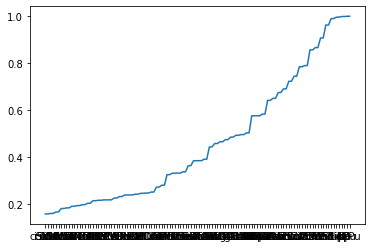

        Volumes  Nb_agent       CDF       Inv
iCg        5207         2  0.465007  0.534993
iAcb       4904         1  0.443098  0.556902
iTC        5332         2  0.474080  0.525920
iAI        2364         1  0.272051  0.727949
iAI-b      5588         2  0.492699  0.507301
...         ...       ...       ...       ...
cTeA       3773         1  0.363355  0.636645
cIns       1793         1  0.238599  0.761401
cV        10003         3  0.784462  0.215538
cV-b       8171         2  0.674742  0.325258
cVTA        747         1  0.183610  0.816390

[116 rows x 4 columns]


In [6]:
import pandas as pd
volumes = pd.read_csv(".\Volume_per_regions.csv", index_col=0, names=["Volumes"])
lst_i = []
lst_c = []

for reg in volumes.index:
#     print(reg)
    lst_i.append("i" + reg.split(sep="(")[0]) #CAREFUL there is a space in the idx now
    lst_c.append("c" + reg.split(sep="(")[0])
    
volumes_i = volumes.copy()
volumes_i.index = lst_i

volumes_c = volumes.copy()
volumes_c.index = lst_c

volumes = pd.concat([volumes_i,volumes_c], axis=0, join="outer")
volumes_copy = volumes.copy()
lst_agent = []
inverse_volume = []
for itr in range(0,116):
    if 0 <volumes_copy.iloc[itr]["Volumes"] <= 5000:
        lst_agent.append(1)
        inverse_volume.append(1/2500)
    if 5000 <volumes_copy.iloc[itr]["Volumes"] <= 10000:
        lst_agent.append(2)
        inverse_volume.append(1/7500)
    if 10000 <volumes_copy.iloc[itr]["Volumes"] <= 15000:
        lst_agent.append(3)
        inverse_volume.append(1/12500)
    if 15000 <volumes_copy.iloc[itr]["Volumes"] <= 20000:
        lst_agent.append(4)
        inverse_volume.append(1/17500)
    if 20000 <volumes_copy.iloc[itr]["Volumes"] <= 25000:
        lst_agent.append(5)
        inverse_volume.append(1/22500)
    if 25000 <volumes_copy.iloc[itr]["Volumes"] <= 30000:
        lst_agent.append(6)
        inverse_volume.append(1/27500)
        
volumes["Nb_agent"] = lst_agent
# volumes["inverse"] = inverse_volume

(vol_loc, vol_scale) = stats.norm.fit(volumes["Volumes"])
for reg in volumes.index:
    volumes.loc[reg, "CDF"] = stats.norm.cdf(volumes.loc[reg, "Volumes"], loc=vol_loc, scale=vol_scale)

plt.plot(volumes["CDF"].sort_values(ascending=True))
plt.show()


for reg in volumes.index:
    volumes.loc[reg, "Inv"] = 1 - volumes.loc[reg, "CDF"]

print(volumes)

## d) $\color{blue}{\text{Synuclein Expression}}$

In [7]:
import pandas as pd
syn_expression = pd.read_csv(".\SncaExpression.csv", index_col=0, header=None)
syn_expression.columns = ["Energy"]
syn_expression

lst_idx_vol = [k.split(sep=" ")[0] for k in volumes.index]
# print(lst_idx_vol)
syn_expression = syn_expression.loc[lst_idx_vol]
vol_copy = volumes.copy()
vol_copy.index = syn_expression.index
# print(syn_expression)

syn_endo = pd.concat([syn_expression["Energy"], vol_copy["Volumes"]], axis=1)
# print(syn_endo)
for k in syn_endo.index:
    syn_endo.loc[k,"ExV"] = syn_endo.loc[k,"Volumes"] * syn_endo.loc[k,"Energy"]

for k in syn_endo.index:
    if 0 < syn_endo.loc[k, "ExV"] < 50000:
        syn_endo.loc[k,"Endo_Prod"] = 1
        
    elif 50000 < syn_endo.loc[k, "ExV"] < 100000:
        syn_endo.loc[k,"Endo_Prod"] = 2
        
    elif 100000 < syn_endo.loc[k, "ExV"] < 150000:
        syn_endo.loc[k,"Endo_Prod"] = 3
        
    elif 150000 < syn_endo.loc[k, "ExV"] < 200000:
        syn_endo.loc[k,"Endo_Prod"] = 4
        
    elif 200000 < syn_endo.loc[k, "ExV"] < 250000:
        syn_endo.loc[k,"Endo_Prod"] = 5
        
    elif 250000 < syn_endo.loc[k, "ExV"] < 300000:
        syn_endo.loc[k,"Endo_Prod"] = 6
        
    elif 300000 < syn_endo.loc[k, "ExV"] < 350000:
        syn_endo.loc[k,"Endo_Prod"] = 7
        
    elif 350000 < syn_endo.loc[k, "ExV"] < 400000:
        syn_endo.loc[k,"Endo_Prod"] = 8

    else:
        syn_endo.loc[k,"Endo_Prod"] = 9

print(syn_endo)

          Energy  Volumes            ExV  Endo_Prod
0                                                  
iCg    21.048571     5207  109599.911436        3.0
iAcb   10.457549     4904   51283.820394        2.0
iTC     2.055500     5332   10959.926000        1.0
iAI    17.962500     2364   42463.350000        1.0
iAI-b  22.006786     5588  122973.918547        3.0
...          ...      ...            ...        ...
cTeA   24.708571     3773   93225.440005        2.0
cIns   22.322143     1793   40023.602148        1.0
cV     15.627750    10003  156324.383250        4.0
cV-b   21.313300     8171  174150.974300        4.0
cVTA    7.750667      747    5789.748000        1.0

[116 rows x 4 columns]


## f) $\color{blue}{\text{Synuclein CDF}}$

In [8]:
import pandas as pd
syn_expression = pd.read_csv(".\SncaExpression.csv", index_col=0, header=None)
syn_expression.columns = ["Energy"]
syn_expression

(syn_loc, syn_scale) = stats.uniform.fit(data=syn_expression["Energy"]) #Returns loc, scale : float --> Maximum likelihood estimates for the location and scale.

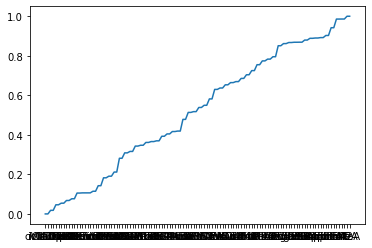

In [9]:
for reg in syn_expression.index:
    syn_expression.loc[reg, "CDF"] = stats.uniform.cdf(syn_expression.loc[reg, "Energy"], loc=syn_loc, scale=syn_scale)

plt.plot(syn_expression["CDF"].sort_values(ascending=True))
plt.show()

In [10]:
syn_expression = pd.DataFrame(syn_expression["CDF"].sort_values(ascending=True))
print(syn_expression)

               CDF
0                 
cVMThal   0.000000
iVMThal   0.000000
iCauThal  0.018138
cCauThal  0.018138
iLDThal   0.046184
...            ...
iEnt      0.985708
cM2       0.985962
iM2       0.985962
cTeA      1.000000
iTeA      1.000000

[116 rows x 1 columns]


In [11]:
# Agent --> a-syn
class a_syn(ap.Agent):

    def setup(self):
        """ Initialize a new variable at agent creation. """
        self.condition = 0  # Susceptible = 0, Misfolded = 1, Degradation = 2

    def bearing_patho(self, agent): 
        """ Spread disease to regions in the network.
            1 --> The Pathology is transmitted to neighbors region
            2 --> The Pathology is transmitted within the region with misfolded syn""" #### DISTANCE to implement?
        # 1
        # Misfolding transmission to the neighbors
        rng = self.model.random
#         print(self.our_network.neighbors(agent))
        
        source = (str(self.our_network.positions[agent]).split("(")[1]).split(")")[0] # Name of the Region in which the infected agent is located

        for idx, n in enumerate(self.our_network.neighbors(agent)):
            
            inpt = (str(self.our_network.positions[n]).split("(")[1]).split(")")[0] # For every neighbor we extract its name so that we can compute the connectivity strength
#             print("From", source, "to", inpt, "Norm val =", Norm_W.loc[str(source), str(inpt)]) #NB CHECK IF IT IS NOT THE OPPOSITE    
            
            if n.condition == 0 and self.p.infection_chance * CDF_Connectivity.loc[str(source), str(inpt)] > rng.random():
                n.condition = 1  # Misfold susceptible peer

        # 2        
        # Misfolding transmission inside the same region
            # 2.1 Extraction of all agents from the specific brain region
        rng2 = self.model.random
        idx_agents_in_reg = []
        for idx, values in enumerate(self.our_network.positions.values()):
            if str(values) == str(self.our_network.positions[agent]):
#                 print("Idx:", idx, "Values if", values, "Agent number", [ag for ag in self.our_network.positions.keys()][idx])
                idx_agents_in_reg.append(idx) # Via extraction of their index
            
            # 2.2 Counting the number of infected agents for that specific region
        nb_infected_agent = 0
        total_agent_reg = len(idx_agents_in_reg)
        for ag in idx_agents_in_reg: # Then, 
            specific_agent = [ag for ag in self.our_network.positions.keys()][ag]
#             print("Specific agent", specific_agent)
            if specific_agent.condition == 1:
                nb_infected_agent = nb_infected_agent + 1
            
            # 2.3 Misfolding is spreading inside the same brain region
        for ag in idx_agents_in_reg:
            if specific_agent.condition == 0 and self.p.volume_table.loc[source+" ","Inv"]> rng2.random(): # nber agent can be considered (multiplicative factor?)
                specific_agent.condition = 1
                nb_infected_agent = nb_infected_agent + 1 # One new infected agent, needs to be considered
                
    def refolding_or_degradation(self, agent):
        """
        .
        
        """
        # Refolding and Degradation via a "érecovery_rate. Then 1 chance out of 2 to be degraded or recover
        rng3 = self.model.random.random()
#         print("Recovery rate is", self.p.recovery_chance, "for the", agent)

        if agent.condition == 1:
            if self.p.recovery_chance > rng3: #Right now the recovery and degradation depending on randomness but later ==> Enzymes? etc.
                lst_outcome = [0,1]
                x = random.sample(lst_outcome,  1)   # Pick a random item from the list
                if x[0] == 0:
                    agent.condition = 0  # Recover from misfolding (ie refolding)
                if x[0] == 1:
                    agent.condition = 2 # Degradation
                    
        if agent.condition == 0:
            if self.p.degradation_rate > rng3:
                agent.condition = 2  # Degraded state

In [12]:
class SynModel(ap.Model):
    def setup(self):
        """
        .
        
        """
        # 1 Creation of the graph
        self.agents = ap.AgentList(self, 116, a_syn)
        self.our_network = self.agents.network = ap.Network(self, graph)
#         print(self.agents)
        
        # 2 Initialisation of the variables
        volumes = self.p.volume_table
        syn_endo = self.p.energy_table

        # 3 Adding up the agents to the brain regions
        for itr in range(0,len(volumes.index)):
            volume_reg = volumes.iloc[itr]["Nb_agent"]
            for nber_agent in range(0, int(volume_reg)): # Each iteration we will add 1 specific agent
                self.agents = ap.AgentList(self, 1, a_syn)   
                self.our_network.add_agents(agents=self.agents, positions=[k for k in self.our_network.nodes][itr:itr+1])

#         print(self.our_network.nodes)
#         print("from type", type(self.our_network.nodes))
# #         print("Subpositions?", [k for k in self.our_network.nodes][10:15])
        
#         print(self.our_network.agents)
#         print(self.our_network.positions)


#         print(type(self.our_network.positions))
#         print(len(self.our_network.positions))
#         print(self.our_network.positions.keys())
#         print(self.our_network.positions.values())
        
        
#         #SUPER IMPORTANT TO KEEP AS QUALITATIVELY INTERESTING
#         for ag in self.our_network.agents:
#             self.our_network.neighbors(ag)
#         for ag in self.our_network.nodes:
#             print(ag)
            
        # 4    
        # 4.1 Selection of the agents in the CPu
        lst_idx_agent_CPu = []
        for idx, values in enumerate(self.our_network.positions.values()):
            if str(values) == "AgentNode (iCPu)":
                print("Idx:", idx, "Values if", values, "Agent number", [ag for ag in self.our_network.positions.keys()][idx])
                lst_idx_agent_CPu.append(idx)
        random_index = random.randrange(len(lst_idx_agent_CPu))
        print("random selected agent of the CPu is",[ag for ag in self.our_network.positions.keys()][lst_idx_agent_CPu[random_index]])
        
        # 4.2 Randomly setting one infected agent among the agents in the CPu
        [ag for ag in self.our_network.positions.keys()][lst_idx_agent_CPu[random_index]].condition = 1
        print("The infected seed has a condition value equal to:",[ag for ag in self.our_network.positions.keys()][lst_idx_agent_CPu[random_index]].condition)

        
        # 5 Creation of a table that contains the number of agents per regions & their condition
        lst_nodes = []
        for nodes in self.our_network.nodes:
            lst_nodes.append(str(nodes))
        self.record_df = pd.DataFrame(0, index=lst_nodes, columns=["S","I","R","Total"]) 
#         print("Initialization of the table: \n", self.record_df)
        self.lst_share_reg_S = []
        self.lst_share_reg_I = []
        self.lst_share_reg_R = []
        #TEST
        self.lst_ratio_per_region =[]
        # 6
            # 6.1 Building up a follow-up table for the pathology/region
        reg_names = [str(k).split("(")[1].split(")")[0] for k in self.record_df.index]
        cond_names =["_S","_I","_R"]
        idx_record_region = []
        for reg in reg_names:
            for cond in cond_names:
                idx_record_region.append(reg+cond) 
        self.record_region = pd.DataFrame(0, index=idx_record_region, columns= [k for k in range(0,self.p.steps+1)])
#         print(self.record_region)
        self.iterat = 0
        self.iter2 = 0
            # 6.2 Building up a follow-up table for the pathology/region --> Condition S
        idx_record_region = [str(k).split("(")[1].split(")")[0] + "_S" for k in self.record_df.index] 
        self.record_region_S = pd.DataFrame(0, index=idx_record_region, columns= [k for k in range(0,self.p.steps+1)])
        
            # 6.3 Building up a follow-up table for the pathology/region --> Condition I
        idx_record_region = [str(k).split("(")[1].split(")")[0] + "_I" for k in self.record_df.index] 
        self.record_region_I = pd.DataFrame(0, index=idx_record_region, columns= [k for k in range(0,self.p.steps+1)])
        
            # 6.4 Building up a follow-up table for the pathology/region --> Condition R
        idx_record_region = [str(k).split("(")[1].split(")")[0] + "_R" for k in self.record_df.index] 
        self.record_region_R = pd.DataFrame(0, index=idx_record_region, columns= [k for k in range(0,self.p.steps+1)])
        
            # 6.5 Building up a follow-up table for the pathology/region --> syn_patho/(syn+syn_patho)
        idx_record_region = [str(k).split("(")[1].split(")")[0] for k in self.record_df.index] 
        self.record_region_ratio = pd.DataFrame(0, index=idx_record_region, columns= ["t: " + str(k) for k in range(0,self.p.steps+1)])
#         print("The table looks like:", self.record_region_ratio)
        
    def update(self):
        """ Record variables after setup and each step. """
#         print("\n --- Updating the Model --- \n")

        # 1 Reinitialization before each update
        reinitialization = np.zeros((len(self.record_df),1))
        self.record_df["S"] = reinitialization
        self.record_df["I"] = reinitialization
        self.record_df["R"] = reinitialization
        
        # 2.1 Pathology as a ratio per region at each timepoint.
        for nodes in self.our_network.nodes:
            nb_S = 0
            nb_I = 0
            nb_R = 0
#             print(nodes)
            for idx, values in enumerate(self.our_network.positions.values()):
                if str(values) == str(nodes):
#                     print("for that node", nodes, "Value is", [k for k in self.our_network.positions.keys()][idx])
                    if [k for k in self.our_network.positions.keys()][idx].condition == 0:
                        nb_S = nb_S + 1
                    if [k for k in self.our_network.positions.keys()][idx].condition == 1:
                        nb_I = nb_I + 1
                    if [k for k in self.our_network.positions.keys()][idx].condition == 2:
                        nb_R = nb_R + 1
#             print("After iteration among agents", nb_S, nb_I, nb_R)
#             print("Ratio is", nb_I / (nb_I + nb_S))
            nodes_name = str(nodes).split("(")[1].split(")")[0]
            if  (nb_I + nb_S) != 0: #Can't divide by 0
                self.record_region_ratio.loc[nodes_name,"t: " + str(self.iter2)] = nb_I / (nb_I + nb_S)
            else:
                self.record_region_ratio.loc[nodes_name,"t: " + str(self.iter2)] = 0

# OR
#             self.record_region_ratio.loc[nodes_name,"t: " + str(self.iter2)] = nb_I / volumes.loc[nodes_name+" ", "Volumes"]
    
        self.iter2 = self.iter2 + 1 # Iterator

        # 2.2 Recordings of the pathology at a specific step
#         print("before counting nodes \n",self.record_df)
        for nodes in self.our_network.nodes:
#             print(nodes)  
            for idx, values in enumerate(self.our_network.positions.values()):
                if str(values) == str(nodes):
#                     print("Values is", [k for k in self.our_network.positions.keys()][idx])
                    nodes_name = str(nodes).split("(")[1].split(")")[0]
                    if [k for k in self.our_network.positions.keys()][idx].condition == 0:
                        self.record_df.loc[str(nodes), "S"] = self.record_df.loc[str(nodes), "S"] + 1
                        self.record_region.loc[nodes_name+"_S",self.iterat] = self.record_region.loc[nodes_name+"_S",self.iterat] + 1
                        self.record_region_S.loc[nodes_name+"_S",self.iterat] = self.record_region_S.loc[nodes_name+"_S",self.iterat] + 1
                        
                    if [k for k in self.our_network.positions.keys()][idx].condition == 1:
                        self.record_df.loc[str(nodes), "I"] = self.record_df.loc[str(nodes), "I"] + 1
                        self.record_region.loc[nodes_name+"_I",self.iterat] = self.record_region.loc[nodes_name+"_I",self.iterat] + 1
                        self.record_region_I.loc[nodes_name+"_I",self.iterat] = self.record_region_I.loc[nodes_name+"_I",self.iterat] + 1
                        
                    if [k for k in self.our_network.positions.keys()][idx].condition == 2:
                        self.record_df.loc[str(nodes), "R"] = self.record_df.loc[str(nodes), "R"] + 1
                        self.record_region.loc[nodes_name+"_R",self.iterat] = self.record_region.loc[nodes_name+"_R",self.iterat] + 1
                        self.record_region_R.loc[nodes_name+"_R",self.iterat] = self.record_region_R.loc[nodes_name+"_R",self.iterat] + 1

        self.iterat = self.iterat + 1 # Iterator
            
        # Creation of a column that contains the total amount of agent/brain region
        self.record_df["Total"] = self.record_df[["S","I","R"]].sum(axis=1).values
#         print("After update \n", self.record_df)

        # Record the share of agents with each condition FOR EACH BRAIN REGION
                # Susceptible
        self.record_df["Share_Region_S"] = (self.record_df["S"].values/self.record_df["Total"].values)
        self.lst_share_reg_S.append(self.record_df["S"].values)
                # Infected
        self.record_df["Share_Region_I"] = (self.record_df["I"].values/self.record_df["Total"].values)
        self.lst_share_reg_I.append(self.record_df["I"].values)
                # Recovered
        self.record_df["Share_Region_R"] = (self.record_df["R"].values/self.record_df["Total"].values)
        self.lst_share_reg_R.append(self.record_df["R"].values)
#         print(self.record_df)
        
        
        # Record the share of agents with each condition NO MATTER THE BRAIN REGION
            # Extraction of the total number of agent no matter the condition nor the brain region
        total_agent = self.record_df["Total"].sum(axis=0)
#         print("Total_agent:", total_agent)
        
            #Extraction of the total number of agent per condition ("S","I","R") not considering the region
        nb_agent_S = self.record_df["S"].sum(axis=0)
#         print("Susceptible", nb_agent_S)
        self["S"] = nb_agent_S / total_agent
        self.record("S")
        
        nb_agent_I = self.record_df["I"].sum(axis=0)
#         print("Infected", nb_agent_I)
        self["I"] = nb_agent_I / total_agent
        self.record("I")
        
        nb_agent_R = self.record_df["R"].sum(axis=0)
#         print("Recovered", nb_agent_R)
        self["R"] = nb_agent_R / total_agent
        self.record("R")
        
#         print("After Update", record_df)
        
#             # Record share of agents with each condition
#         for i, c in enumerate(('S', 'I', 'R')): # 0 -> S; 1 -> I; 2 -> R
#             n_agents = len(self.agents.select(self.agents.condition == i))
#             self[c] = n_agents / len(graph.nodes)
#             self.record(c)

        # 3 Stop simulation if disease is gone
        if self.I == 0:
            self.stop()       
            
    def step(self):
        """ Define the models' events per simulation step. """
# 1 Infection
        # Call 'bearing_patho' for infected agents
        for self.ag in self.our_network.agents:
            if self.ag.condition == 1:
                a_syn.bearing_patho(self, agent=self.ag)
                
# 2 Endogenous Production of a-Syn
        # Call production of more normal agents
#         for itr in range(0,len(syn_endo.index)):
#             syn_endo_reg = syn_endo.iloc[itr]["Endo_Prod"]
#             for nber_agent in range(0, int(syn_endo_reg)): # Each iteration we will add 1 specific agent
#                 self.agents = ap.AgentList(self, 1, a_syn)   
#                 self.our_network.add_agents(agents=self.agents, positions=[k for k in self.our_network.nodes][itr:itr+1])

# 3 Endogenous Degradation of a-Syn     
        # Call 'refolding_or_degradation' for infected agents & 'degrad_normal' for normal agents
        for self.ag in self.our_network.agents:
            a_syn.refolding_or_degradation(self, agent=self.ag)
    
##         for self.ag in self.our_network.agents:
##             if self.ag.condition == 1:
##                 print("Infected checking: ",self.ag, "that has the condition", self.ag.condition)
#                 print("The agent is located in:", self.our_network.positions[self.ag])
#                 source = (str(self.our_network.positions[self.ag]).split("(")[1]).split(")")[0]
#                 print("Agent to use to select Norm is:", source)
#                 for idx, n in enumerate(self.our_network.neighbors(self.ag)):
#                     inpt = (str(self.our_network.positions[n]).split("(")[1]).split(")")[0]
#                     print("The agent is projecting to:", inpt)
#                     print("From", source, "to", inpt, "Norm val =", Norm_W.loc[str(source), str(inpt)]) #NB CHECK IF IT IS NOT THE OPPOSITE
                    

    def end(self):
        """ Record evaluation measures at the end of the simulation. """

        # Record final evaluation measures
        self.report('Total share infected', self.I + self.R)
        self.report('Peak share infected', max(self.log['I']))
        
        # Save a table of the spreading per region
        self.record_region.to_csv("./AgentModel_OUTPUT/region_record.csv")
        self.record_region_S.to_csv("./AgentModel_OUTPUT/region_record_S.csv")
        self.record_region_I.to_csv("./AgentModel_OUTPUT/region_record_I.csv")
        self.record_region_R.to_csv("./AgentModel_OUTPUT/region_record_R.csv")
        self.record_region_ratio.to_csv("./AgentModel_OUTPUT/ratio/record_region_ratio{}.csv".format(self.p.doc_name))

In [13]:
data = pd.read_csv("C:\\Users\\thoma\\Documents\\M1_Neurasmus\\NeuroBIM_M1\\Internship\\GitRepo\\PathoSpreading\\Data83018\\data.csv", header=0)
connectivity_ipsi = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_ipsi.csv", index_col=0)
connectivity_contra = pd.read_csv("..\\PathoSpreading\\Data83018\\connectivity_contra.csv", index_col=0)

_, path_data, _, _ = process_pathdata(exp_data=data, connectivity_contra=connectivity_contra, connectivity_ipsi=connectivity_ipsi)

grp_mean = mean_pathology([1,3,6], path_data)
grp_mean
observed_mpi1 = grp_mean["MPI 1"]
observed_mpi3 = grp_mean["MPI 3"]
observed_mpi6 = grp_mean["MPI 6"]


Adjacency matrix: successful concatenation


<ipython-input-1-abf1ee055a0e>:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = path_data[path_data[path_data.columns[0]] == time][path_data[path_data.columns[1]] == 'NTG'][
<ipython-input-1-abf1ee055a0e>:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = path_data[path_data[path_data.columns[0]] == time][path_data[path_data.columns[1]] == 'NTG'][
<ipython-input-1-abf1ee055a0e>:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  l = path_data[path_data[path_data.columns[0]] == time][path_data[path_data.columns[1]] == 'NTG'][


In [ ]:
### RUN 
from tqdm import tqdm
from scipy.stats import pearsonr
lst_table = [observed_mpi1, observed_mpi3, observed_mpi6]
graph = nx.DiGraph(W)
df = pd.DataFrame(index=["Degradation" + str(round(degradation,5)) for degradation in np.linspace(start=0,stop=0.25, num=20)], columns=["Infection" + str(round(infection,5)) for infection in np.linspace(start=0,stop=0.25, num=20)])

for infection in tqdm(np.linspace(start=0,stop=0.25, num=20), desc="Infection"):
    for degradation in tqdm(np.linspace(start=0, stop=0.25, num=20), desc="Degradation"):
        parameters = {
            'infection_chance': infection,
            'recovery_chance': 0.01,
            'degradation_rate':degradation,
            'refolding': 0.5,
            'seed': 15, #iCPu
            'volume_table': volumes,
            'energy_table': syn_endo,
            'doc_name': str(infection)+"_"+str(degradation),
            "steps":300

        }
        model = SynModel(parameters)
        results = model.run()
        predicted = pd.read_csv("./AgentModel_OUTPUT/ratio/record_region_ratio{}.csv".format(str(infection)+"_"+str(degradation)), index_col=0)
        lst_r = []
#         print(predicted)
#         print(predicted.columns)
        for step in predicted.columns:    
            lst_r.append(pearsonr(predicted[step],observed_mpi6)[0])
        df.loc["Degradation" + str(round(degradation,5)),"Infection" + str(round(infection,5))] = np.max(lst_r)
#         print(df)
        df.to_csv("heatmap_deg_inf_6_4.csv")        
#                 df.to_csv("./AgentModel_OUTPUT/ratio/pearson/{}.csv".format(str(inf)))

# results["variables"]["SynModel"].to_csv("Share_per_region_{}.csv".format(inf))
# fig, ax = plt.subplots()
# syn_stackplot(results.variables.SynModel, ax)


# Need to be done:
     #1 --> CDF V
     #(2) --> Fixing number agent attributed + endogenous production
     #3 --> Each t and each region --> computing syn_patho/(syn+syn_patho)
     #4 --> Fit

Degradation:   0%|          | 0/20 [00:00<?, ?it/s]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 257 steps
Run time: 0:01:37.225521
Simulation finished



Degradation:   5%|▌         | 1/20 [01:37<30:49, 97.36s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 151 steps
Run time: 0:00:55.335581
Simulation finished



Degradation:  10%|█         | 2/20 [02:32<21:49, 72.73s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 178 steps
Run time: 0:00:58.311859
Simulation finished



Degradation:  15%|█▌        | 3/20 [03:31<18:45, 66.20s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 215 steps
Run time: 0:01:10.954836
Simulation finished



Degradation:  20%|██        | 4/20 [04:42<18:10, 68.14s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 202 steps
Run time: 0:01:05.847124
Simulation finished



Degradation:  25%|██▌       | 5/20 [05:48<16:50, 67.36s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 52 steps
Run time: 0:00:17.335871
Simulation finished



Degradation:  30%|███       | 6/20 [06:05<11:45, 50.39s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 77 steps
Run time: 0:00:25.997581
Simulation finished



Degradation:  35%|███▌      | 7/20 [06:31<09:11, 42.44s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 139 steps
Run time: 0:00:44.442995
Simulation finished



Degradation:  40%|████      | 8/20 [07:16<08:37, 43.11s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 17 steps
Run time: 0:00:06.639983
Simulation finished



Degradation:  45%|████▌     | 9/20 [07:23<05:49, 31.75s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 47 steps
Run time: 0:00:15.622608
Simulation finished



Degradation:  50%|█████     | 10/20 [07:38<04:28, 26.81s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 148 steps
Run time: 0:00:47.277794
Simulation finished



Degradation:  55%|█████▌    | 11/20 [08:26<04:58, 33.12s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 201 steps


Degradation:  60%|██████    | 12/20 [09:29<05:38, 42.33s/it]


Run time: 0:01:03.268445
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:34.942736
Simulation finished



Degradation:  65%|██████▌   | 13/20 [11:04<06:48, 58.32s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 72 steps
Run time: 0:00:22.847548
Simulation finished



Degradation:  70%|███████   | 14/20 [11:27<04:45, 47.65s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 70 steps
Run time: 0:00:22.876668
Simulation finished



Degradation:  75%|███████▌  | 15/20 [11:50<03:21, 40.23s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 3 steps


Degradation:  80%|████████  | 16/20 [11:52<01:54, 28.64s/it]


Run time: 0:00:01.637937
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 179 steps
Run time: 0:00:57.087622
Simulation finished



Degradation:  85%|████████▌ | 17/20 [12:49<01:51, 37.24s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 150 steps
Run time: 0:00:49.019061
Simulation finished



Degradation:  90%|█████████ | 18/20 [13:39<01:21, 40.82s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 12 steps
Run time: 0:00:05.292245
Simulation finished



Degradation:  95%|█████████▌| 19/20 [13:44<00:30, 30.18s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 113 steps


Degradation:   0%|          | 0/20 [00:00<?, ?it/s]


Run time: 0:00:36.623306
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:02:05.370802
Simulation finished



Degradation:   5%|▌         | 1/20 [02:05<39:44, 125.52s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:51.330561
Simulation finished



Degradation:  10%|█         | 2/20 [03:56<35:10, 117.25s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:49.782956
Simulation finished



Degradation:  15%|█▌        | 3/20 [05:46<32:16, 113.91s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:50.777358
Simulation finished



Degradation:  20%|██        | 4/20 [07:37<30:03, 112.74s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:49.240655
Simulation finished



Degradation:  25%|██▌       | 5/20 [09:27<27:52, 111.53s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:43.820129
Simulation finished



Degradation:  30%|███       | 6/20 [11:11<25:25, 108.97s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:40.433892
Simulation finished



Degradation:  35%|███▌      | 7/20 [12:51<23:01, 106.24s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:36.845660
Simulation finished



Degradation:  40%|████      | 8/20 [14:28<20:39, 103.30s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:38.874830
Simulation finished



Degradation:  45%|████▌     | 9/20 [16:07<18:41, 101.96s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 140 steps
Run time: 0:00:44.784952
Simulation finished



Degradation:  50%|█████     | 10/20 [16:52<14:03, 84.36s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 1:09:38.085021
Simulation finished



Degradation:  55%|█████▌    | 11/20 [1:26:31<3:20:35, 1337.30s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:40.516356
Simulation finished



Degradation:  60%|██████    | 12/20 [1:28:11<2:08:09, 961.13s/it] 

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 292 steps
Run time: 0:01:36.955409
Simulation finished



Degradation:  65%|██████▌   | 13/20 [1:29:48<1:21:35, 699.39s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 114 steps
Run time: 0:00:37.678604
Simulation finished



Degradation:  70%|███████   | 14/20 [1:30:26<49:57, 499.56s/it]  

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:37.514512
Simulation finished



Degradation:  75%|███████▌  | 15/20 [1:32:04<31:32, 378.42s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:47.627291
Simulation finished



Degradation:  80%|████████  | 16/20 [1:33:52<19:47, 296.97s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 126 steps
Run time: 0:00:38.250663
Simulation finished



Degradation:  85%|████████▌ | 17/20 [1:34:30<10:57, 219.21s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 198 steps
Run time: 0:01:00.096807
Simulation finished



Degradation:  90%|█████████ | 18/20 [1:35:30<05:42, 171.44s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:26.767686
Simulation finished



Degradation:  95%|█████████▌| 19/20 [1:36:57<02:26, 146.06s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 233 steps
Run time: 0:01:08.643567
Simulation finished



Degradation:   0%|          | 0/20 [00:00<?, ?it/s]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:02:00.847650
Simulation finished



Degradation:   5%|▌         | 1/20 [02:00<38:18, 120.99s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:42.903214
Simulation finished



Degradation:  10%|█         | 2/20 [03:44<33:07, 110.44s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:43.168863
Simulation finished



Degradation:  15%|█▌        | 3/20 [05:27<30:22, 107.19s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps


Degradation:  20%|██        | 4/20 [07:08<27:58, 104.90s/it]


Run time: 0:01:41.243446
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:02:09.195508
Simulation finished



Degradation:  25%|██▌       | 5/20 [09:18<28:25, 113.72s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:56.805808
Simulation finished



Degradation:  30%|███       | 6/20 [11:15<26:47, 114.82s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:48.938667
Simulation finished



Degradation:  35%|███▌      | 7/20 [13:04<24:28, 112.95s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:41.849899
Simulation finished



Degradation:  40%|████      | 8/20 [14:46<21:53, 109.47s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:36.880906
Simulation finished



Degradation:  45%|████▌     | 9/20 [16:23<19:21, 105.58s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 299 steps

Completed: 300 steps
Run time: 0:01:38.034440
Simulation finished


Degradation:  50%|█████     | 10/20 [18:01<17:12, 103.29s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 208 steps
Run time: 0:01:07.301760
Simulation finished



Degradation:  55%|█████▌    | 11/20 [19:08<13:50, 92.32s/it] 

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps


Degradation:  60%|██████    | 12/20 [20:52<12:45, 95.63s/it]


Run time: 0:01:43.038539
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:38.845815
Simulation finished



Degradation:  65%|██████▌   | 13/20 [22:31<11:16, 96.70s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:45.573628
Simulation finished



Degradation:  70%|███████   | 14/20 [24:16<09:56, 99.44s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps


Degradation:  75%|███████▌  | 15/20 [26:03<08:27, 101.52s/it]


Run time: 0:01:46.220953
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:34.318861
Simulation finished



Degradation:  80%|████████  | 16/20 [27:37<06:37, 99.41s/it] 

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps


Degradation:  85%|████████▌ | 17/20 [29:15<04:56, 98.84s/it]


Run time: 0:01:37.331453
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 293 steps
Run time: 0:01:29.079518
Simulation finished



Degradation:  90%|█████████ | 18/20 [30:44<03:11, 95.94s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 274 steps
Run time: 0:01:34.946154
Simulation finished



Degradation:  95%|█████████▌| 19/20 [32:19<01:35, 95.68s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:35.016242
Simulation finished



Degradation:   0%|          | 0/20 [00:00<?, ?it/s]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:02:00.397861
Simulation finished



Degradation:   5%|▌         | 1/20 [02:00<38:09, 120.52s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:46.435857
Simulation finished



Degradation:  10%|█         | 2/20 [03:47<33:41, 112.32s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:56.471386
Simulation finished



Degradation:  15%|█▌        | 3/20 [05:43<32:22, 114.28s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:56.551257
Simulation finished



Degradation:  20%|██        | 4/20 [07:40<30:43, 115.25s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:54.360048
Simulation finished



Degradation:  25%|██▌       | 5/20 [09:34<28:44, 114.97s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:55.219429
Simulation finished



Degradation:  30%|███       | 6/20 [11:30<26:51, 115.11s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:52.970679
Simulation finished



Degradation:  35%|███▌      | 7/20 [13:23<24:48, 114.46s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps


Degradation:  40%|████      | 8/20 [15:16<22:48, 114.08s/it]


Run time: 0:01:53.123625
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:54.488091
Simulation finished



Degradation:  45%|████▌     | 9/20 [17:11<20:56, 114.25s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:54.219665
Simulation finished



Degradation:  50%|█████     | 10/20 [19:05<19:02, 114.28s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:47.925461
Simulation finished



Degradation:  55%|█████▌    | 11/20 [20:53<16:51, 112.38s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:50.942721
Simulation finished



Degradation:  60%|██████    | 12/20 [22:44<14:55, 112.00s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:41.918252
Simulation finished



Degradation:  65%|██████▌   | 13/20 [24:26<12:42, 109.00s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:52.720709
Simulation finished



Degradation:  70%|███████   | 14/20 [26:19<11:01, 110.17s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:56.903821
Simulation finished



Degradation:  75%|███████▌  | 15/20 [28:16<09:21, 112.24s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:52.942673
Simulation finished



Degradation:  80%|████████  | 16/20 [30:09<07:30, 112.51s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:48.310089
Simulation finished



Degradation:  85%|████████▌ | 17/20 [31:58<05:33, 111.29s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:42.919306
Simulation finished



Degradation:  90%|█████████ | 18/20 [33:41<03:37, 108.82s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps


Degradation:  95%|█████████▌| 19/20 [35:27<01:47, 107.90s/it]


Run time: 0:01:45.609646
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:48.575375
Simulation finished



Degradation:   0%|          | 0/20 [00:00<?, ?it/s]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:02:05.540043
Simulation finished



Degradation:   5%|▌         | 1/20 [02:05<39:48, 125.70s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:54.448723
Simulation finished



Degradation:  10%|█         | 2/20 [04:00<35:45, 119.19s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:53.617370
Simulation finished



Degradation:  15%|█▌        | 3/20 [05:54<33:04, 116.71s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:53.182307
Simulation finished



Degradation:  20%|██        | 4/20 [07:47<30:45, 115.37s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:56.324655
Simulation finished



Degradation:  25%|██▌       | 5/20 [09:43<28:56, 115.76s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 299 steps


Degradation:  30%|███       | 6/20 [11:36<26:47, 114.84s/it]

Completed: 300 steps
Run time: 0:01:52.901982
Simulation finished
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:52.402563
Simulation finished



Degradation:  35%|███▌      | 7/20 [13:29<24:43, 114.09s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 300 steps
Run time: 0:01:49.199703
Simulation finished



Degradation:  40%|████      | 8/20 [15:18<22:30, 112.58s/it]

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 297 steps

In [267]:
results['reporters']

Total share infected  Peak share infected
0              0.995098             0.990196

Timepoint : 0it [00:00, ?it/s]
Over infection rate:   0%|          | 0/20 [00:00<?, ?it/s]

MPI  1
0.0


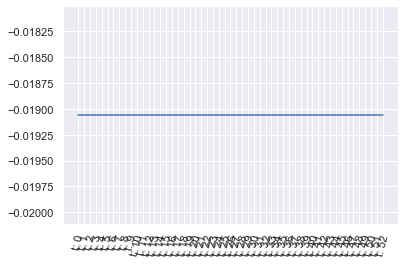


Over infection rate:   5%|▌         | 1/20 [00:01<00:21,  1.15s/it]

0.013157894736842105


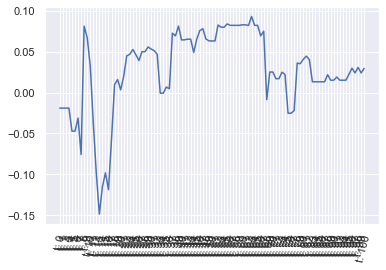


Over infection rate:  10%|█         | 2/20 [00:03<00:31,  1.77s/it]

0.02631578947368421


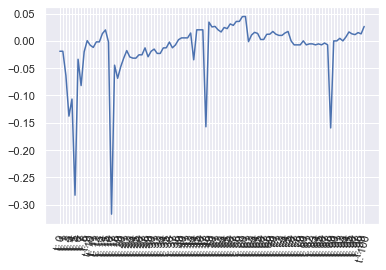


Over infection rate:  15%|█▌        | 3/20 [00:05<00:33,  1.96s/it]

0.039473684210526314


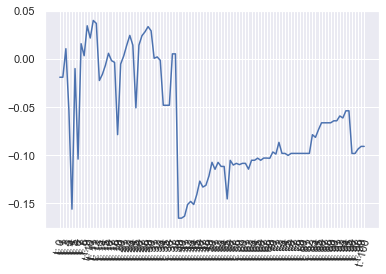


Over infection rate:  20%|██        | 4/20 [00:07<00:32,  2.04s/it]

0.05263157894736842


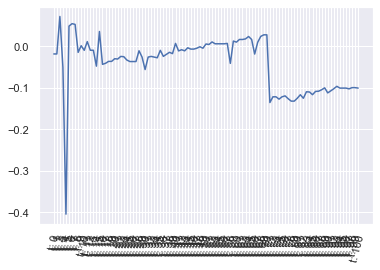


Over infection rate:  25%|██▌       | 5/20 [00:10<00:35,  2.36s/it]

0.06578947368421052


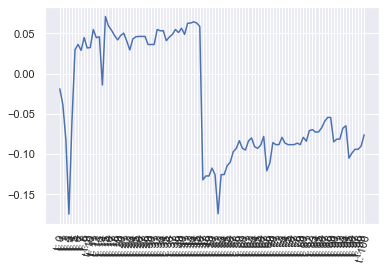


Over infection rate:  30%|███       | 6/20 [00:12<00:32,  2.33s/it]

0.07894736842105263


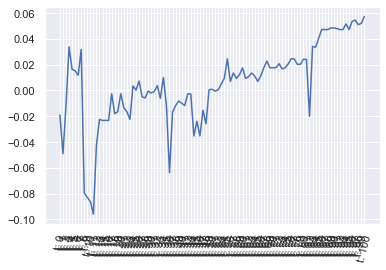


Over infection rate:  35%|███▌      | 7/20 [00:15<00:30,  2.35s/it]

0.09210526315789473


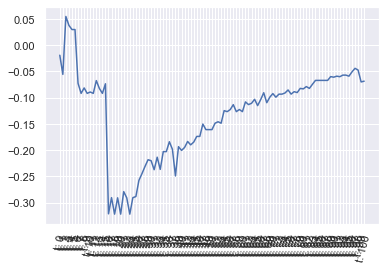


Over infection rate:  40%|████      | 8/20 [00:17<00:28,  2.34s/it]

0.10526315789473684


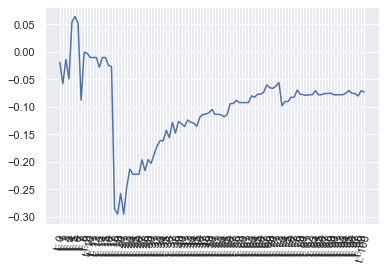


Over infection rate:  45%|████▌     | 9/20 [00:20<00:26,  2.39s/it]

0.11842105263157894


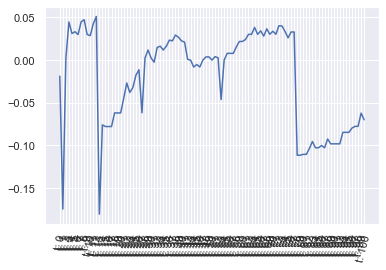


Over infection rate:  50%|█████     | 10/20 [00:22<00:23,  2.38s/it]

0.13157894736842105


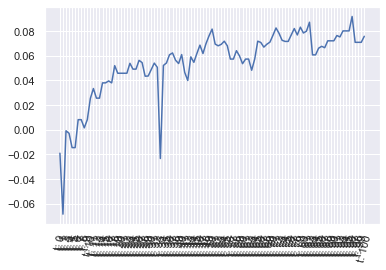


Over infection rate:  55%|█████▌    | 11/20 [00:24<00:21,  2.35s/it]

0.14473684210526316


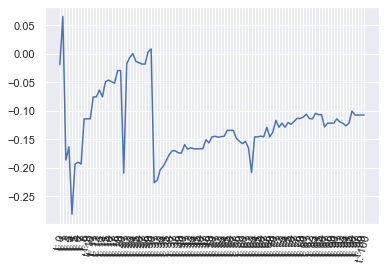


Over infection rate:  60%|██████    | 12/20 [00:26<00:18,  2.31s/it]

0.15789473684210525


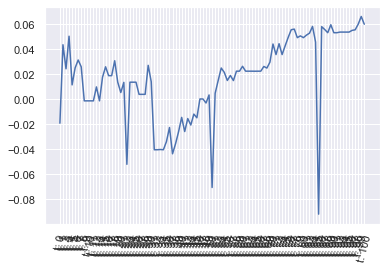


Over infection rate:  65%|██████▌   | 13/20 [00:29<00:16,  2.32s/it]

0.17105263157894735


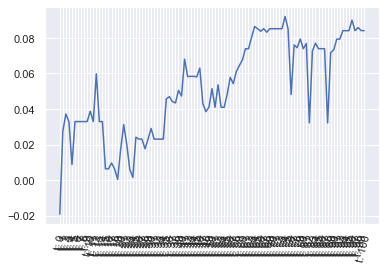


Over infection rate:  70%|███████   | 14/20 [00:31<00:13,  2.31s/it]

0.18421052631578946


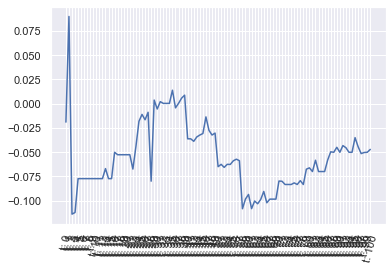


Over infection rate:  75%|███████▌  | 15/20 [00:34<00:11,  2.36s/it]

0.19736842105263158


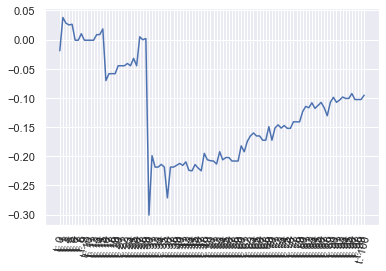


Over infection rate:  80%|████████  | 16/20 [00:36<00:09,  2.31s/it]

0.21052631578947367


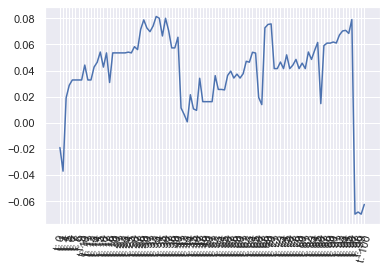


Over infection rate:  85%|████████▌ | 17/20 [00:38<00:06,  2.30s/it]

0.22368421052631576


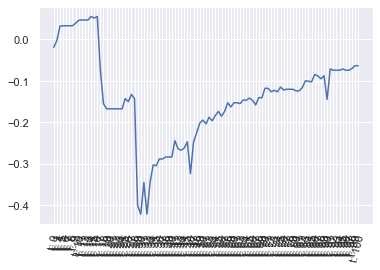


Over infection rate:  90%|█████████ | 18/20 [00:40<00:04,  2.23s/it]

0.23684210526315788


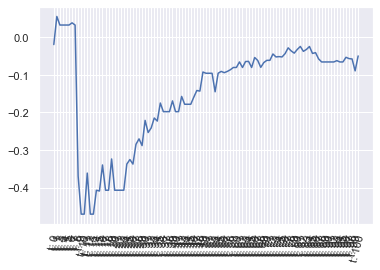


Over infection rate:  95%|█████████▌| 19/20 [00:42<00:02,  2.23s/it]

0.25


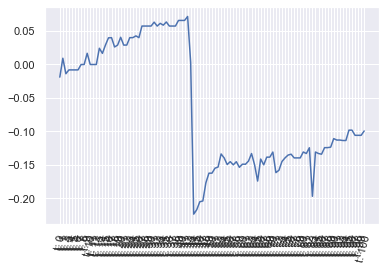


Over infection rate: 100%|██████████| 20/20 [00:44<00:00,  2.25s/it]
Timepoint : 1it [00:45, 45.00s/it]
Over infection rate:   0%|          | 0/20 [00:00<?, ?it/s]

MPI  3
0.0


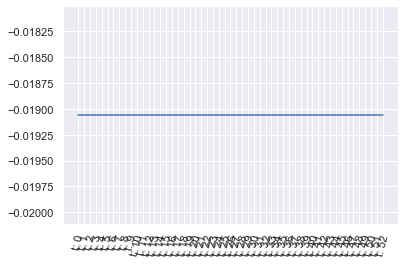


Over infection rate:   5%|▌         | 1/20 [00:01<00:22,  1.17s/it]

0.013157894736842105


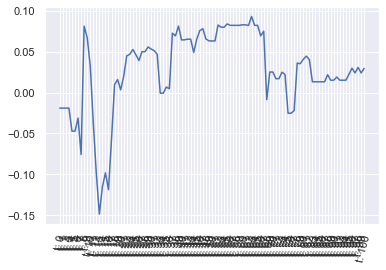


Over infection rate:  10%|█         | 2/20 [00:03<00:30,  1.71s/it]

0.02631578947368421


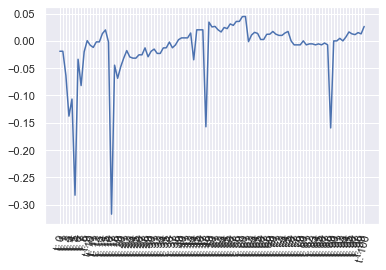


Over infection rate:  15%|█▌        | 3/20 [00:05<00:31,  1.86s/it]

0.039473684210526314


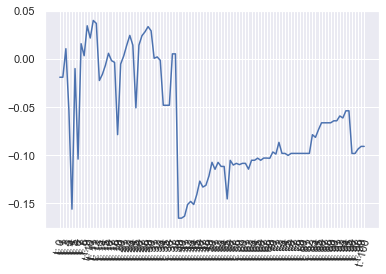


Over infection rate:  20%|██        | 4/20 [00:07<00:32,  2.03s/it]

0.05263157894736842


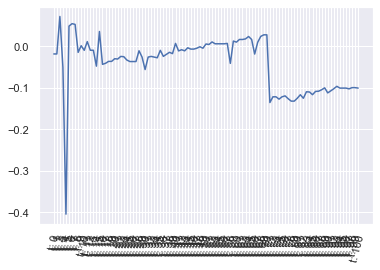


Over infection rate:  25%|██▌       | 5/20 [00:09<00:31,  2.12s/it]

0.06578947368421052


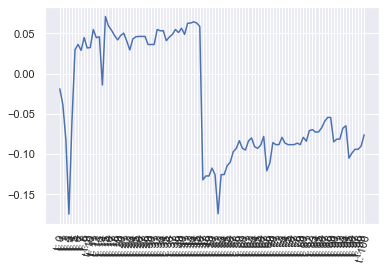


Over infection rate:  30%|███       | 6/20 [00:11<00:29,  2.08s/it]

0.07894736842105263


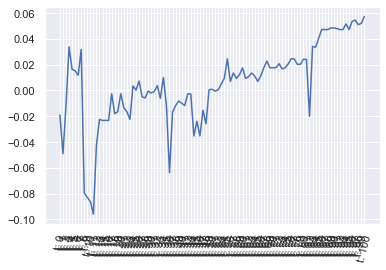


Over infection rate:  35%|███▌      | 7/20 [00:14<00:28,  2.17s/it]

0.09210526315789473


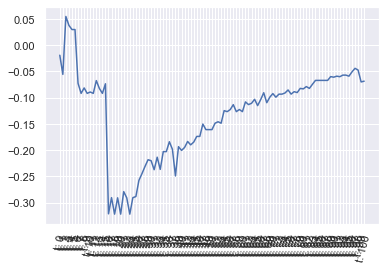


Over infection rate:  40%|████      | 8/20 [00:17<00:28,  2.40s/it]

0.10526315789473684


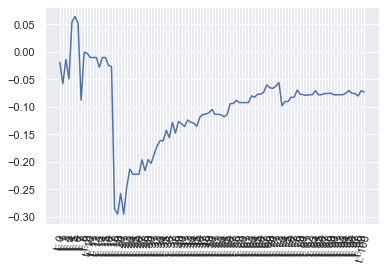


Over infection rate:  45%|████▌     | 9/20 [00:19<00:26,  2.37s/it]

0.11842105263157894


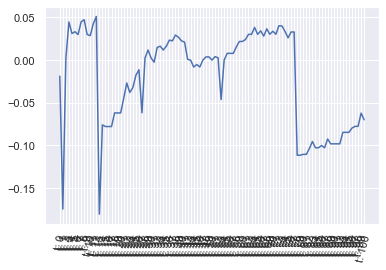


Over infection rate:  50%|█████     | 10/20 [00:21<00:22,  2.24s/it]

0.13157894736842105


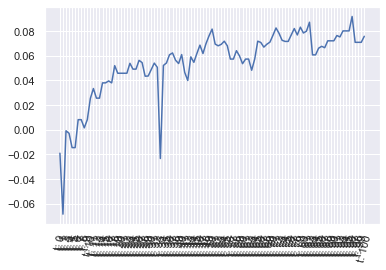


Over infection rate:  55%|█████▌    | 11/20 [00:23<00:19,  2.15s/it]

0.14473684210526316


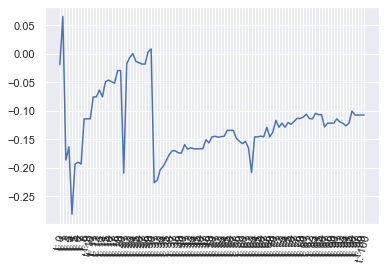


Over infection rate:  60%|██████    | 12/20 [00:26<00:18,  2.32s/it]

0.15789473684210525


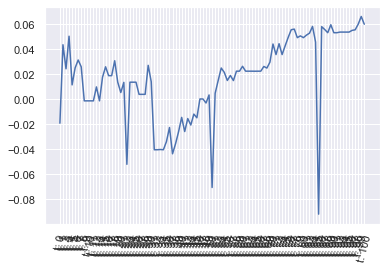


Over infection rate:  65%|██████▌   | 13/20 [00:27<00:15,  2.21s/it]

0.17105263157894735


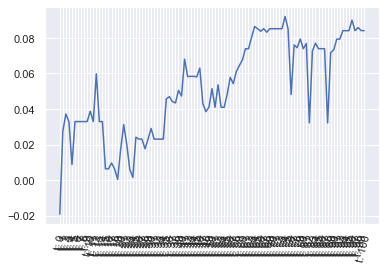


Over infection rate:  70%|███████   | 14/20 [00:29<00:12,  2.13s/it]

0.18421052631578946


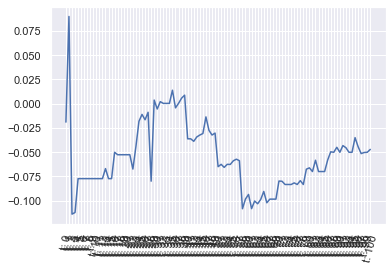


Over infection rate:  75%|███████▌  | 15/20 [00:31<00:10,  2.11s/it]

0.19736842105263158


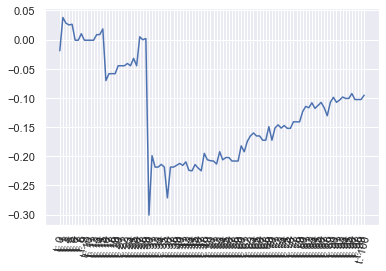


Over infection rate:  80%|████████  | 16/20 [00:34<00:08,  2.09s/it]

0.21052631578947367


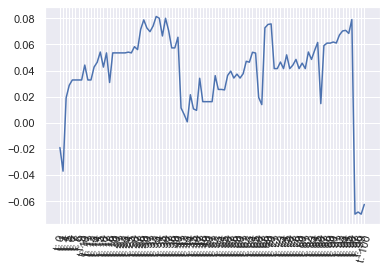


Over infection rate:  85%|████████▌ | 17/20 [00:36<00:06,  2.07s/it]

0.22368421052631576


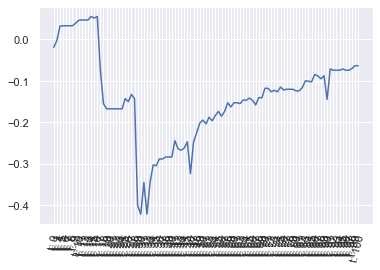


Over infection rate:  90%|█████████ | 18/20 [00:38<00:04,  2.04s/it]

0.23684210526315788


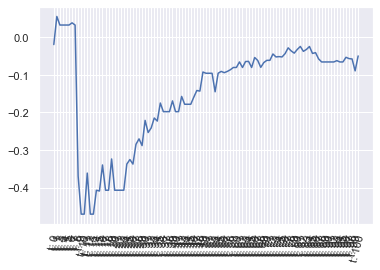


Over infection rate:  95%|█████████▌| 19/20 [00:40<00:02,  2.03s/it]

0.25


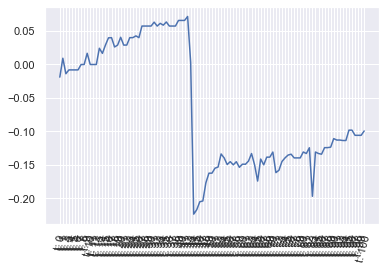


Over infection rate: 100%|██████████| 20/20 [00:41<00:00,  2.10s/it]
Timepoint : 2it [01:26, 43.19s/it]
Over infection rate:   0%|          | 0/20 [00:00<?, ?it/s]

MPI  6
0.0


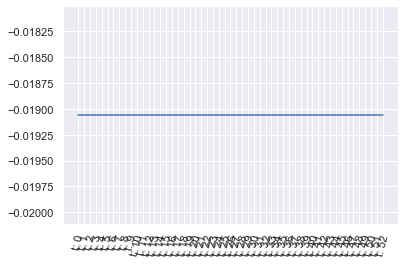


Over infection rate:   5%|▌         | 1/20 [00:01<00:21,  1.12s/it]

0.013157894736842105


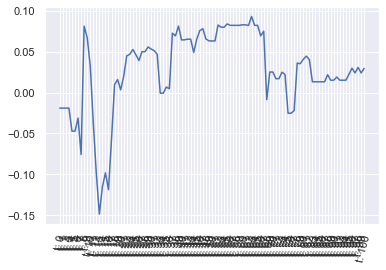


Over infection rate:  10%|█         | 2/20 [00:03<00:28,  1.58s/it]

0.02631578947368421


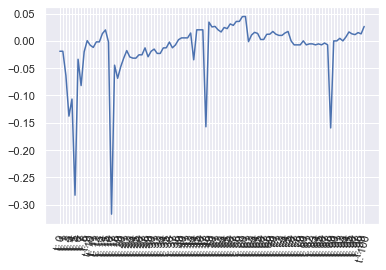


Over infection rate:  15%|█▌        | 3/20 [00:05<00:30,  1.76s/it]

0.039473684210526314


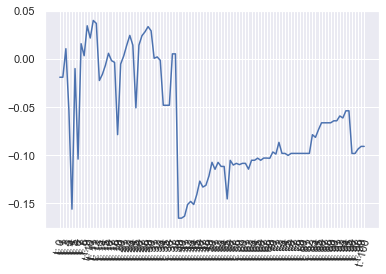


Over infection rate:  20%|██        | 4/20 [00:07<00:31,  1.99s/it]

0.05263157894736842


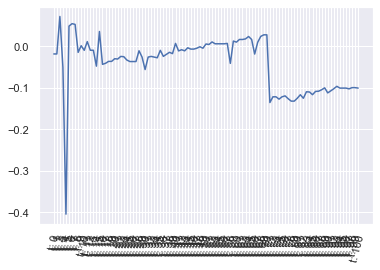


Over infection rate:  25%|██▌       | 5/20 [00:09<00:29,  1.96s/it]

0.06578947368421052


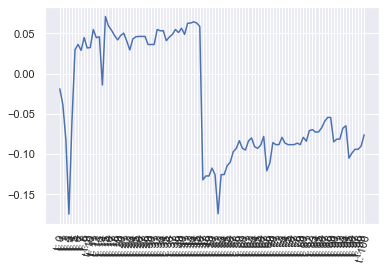


Over infection rate:  30%|███       | 6/20 [00:11<00:29,  2.08s/it]

0.07894736842105263


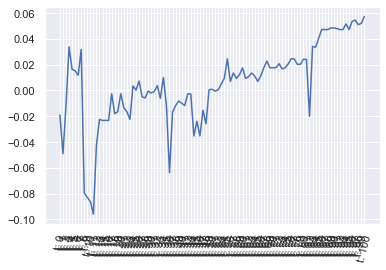


Over infection rate:  35%|███▌      | 7/20 [00:14<00:28,  2.20s/it]

0.09210526315789473


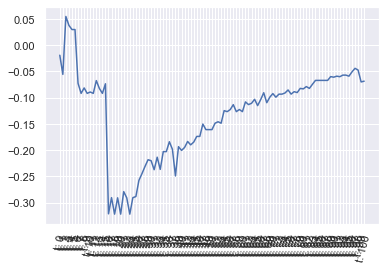


Over infection rate:  40%|████      | 8/20 [00:16<00:27,  2.28s/it]

0.10526315789473684


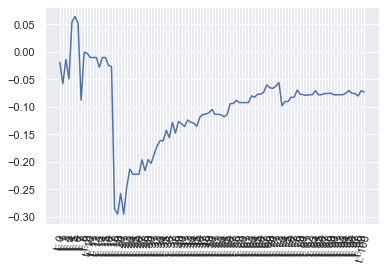


Over infection rate:  45%|████▌     | 9/20 [00:18<00:25,  2.28s/it]

0.11842105263157894


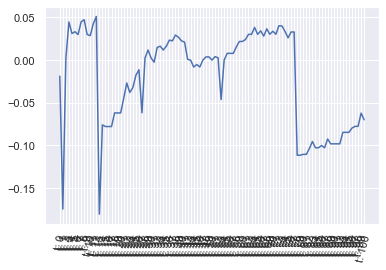


Over infection rate:  50%|█████     | 10/20 [00:21<00:23,  2.33s/it]

0.13157894736842105


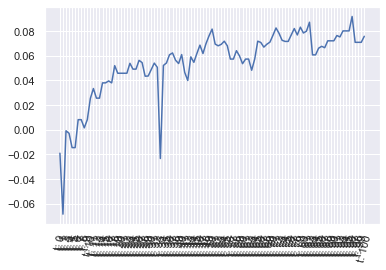


Over infection rate:  55%|█████▌    | 11/20 [00:23<00:21,  2.42s/it]

0.14473684210526316


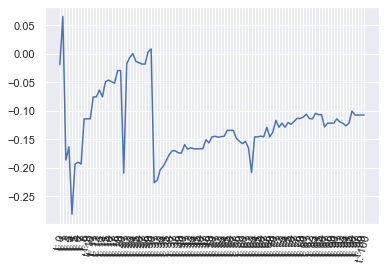


Over infection rate:  60%|██████    | 12/20 [00:26<00:19,  2.42s/it]

0.15789473684210525


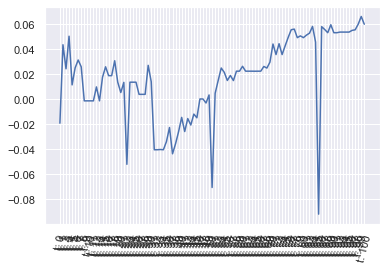


Over infection rate:  65%|██████▌   | 13/20 [00:28<00:16,  2.41s/it]

0.17105263157894735


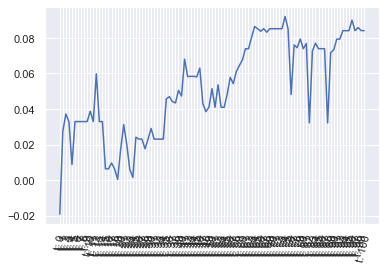


Over infection rate:  70%|███████   | 14/20 [00:30<00:13,  2.32s/it]

0.18421052631578946


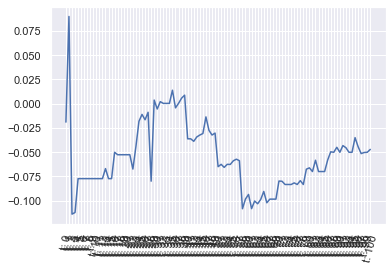


Over infection rate:  75%|███████▌  | 15/20 [00:33<00:11,  2.31s/it]

0.19736842105263158


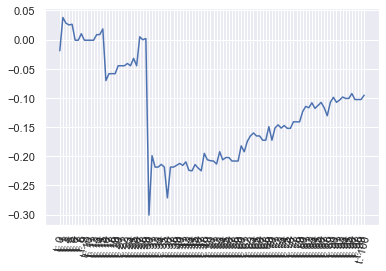


Over infection rate:  80%|████████  | 16/20 [00:35<00:09,  2.26s/it]

0.21052631578947367


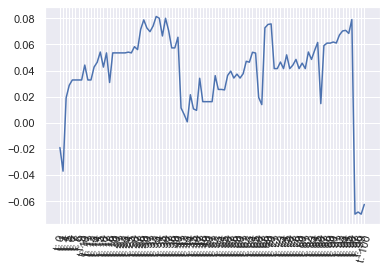


Over infection rate:  85%|████████▌ | 17/20 [00:37<00:06,  2.30s/it]

0.22368421052631576


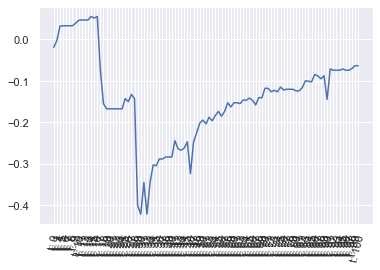


Over infection rate:  90%|█████████ | 18/20 [00:39<00:04,  2.34s/it]

0.23684210526315788


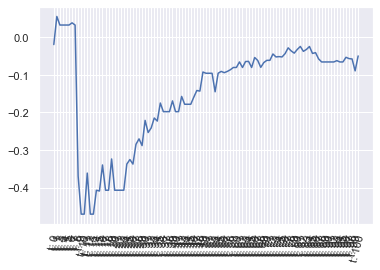


Over infection rate:  95%|█████████▌| 19/20 [00:43<00:02,  2.57s/it]

0.25


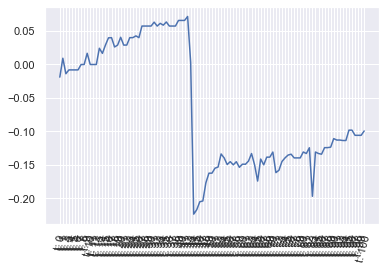


Over infection rate: 100%|██████████| 20/20 [00:45<00:00,  2.25s/it]
Timepoint : 3it [02:12, 44.00s/it]


In [256]:
lst_table = [1, 3, 6]
for idx, reg in tqdm(enumerate(lst_table), desc="Timepoint "):
    print("MPI ", lst_table[idx])
    for inf in tqdm(np.linspace(start=0,stop=0.25,num=20), desc="Over infection rate"):
        print(inf)
        df = pd.read_csv("./AgentModel_OUTPUT/ratio/pearson/{}.csv".format(str(inf)), header=0, index_col=0)
        df = df.dropna(axis=1)
        plt.plot(df.iloc[0])
        plt.xticks(rotation=75)
        plt.show()
        plt.close()

  0%|          | 0/20 [00:00<?, ?it/s]

0.0
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 53 steps
Run time: 0:00:11.177867
Simulation finished


C:\Users\thoma\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
  5%|▌         | 1/20 [00:12<03:55, 12.40s/it]

0.013157894736842105
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:27.741748
Simulation finished


 10%|█         | 2/20 [00:41<06:39, 22.19s/it]

0.02631578947368421
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:27.294487
Simulation finished


 15%|█▌        | 3/20 [01:10<07:07, 25.18s/it]

0.039473684210526314
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:29.729933
Simulation finished


 20%|██        | 4/20 [01:41<07:20, 27.54s/it]

0.05263157894736842
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:30.617495
Simulation finished


 25%|██▌       | 5/20 [02:13<07:16, 29.13s/it]

0.06578947368421052
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:28.303326
Simulation finished


 30%|███       | 6/20 [02:43<06:50, 29.33s/it]

0.07894736842105263
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:31.022545
Simulation finished


 35%|███▌      | 7/20 [03:15<06:34, 30.35s/it]

0.09210526315789473
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:29.433425
Simulation finished


 40%|████      | 8/20 [03:46<06:05, 30.50s/it]

0.10526315789473684
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:29.249222
Simulation finished


 45%|████▌     | 9/20 [04:16<05:35, 30.51s/it]

0.11842105263157894
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:31.306776
Simulation finished


 50%|█████     | 10/20 [04:49<05:12, 31.21s/it]

0.13157894736842105
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 139)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:27.601284
Simulation finished


 55%|█████▌    | 11/20 [05:18<04:34, 30.52s/it]

0.14473684210526316
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:30.394912
Simulation finished


 60%|██████    | 12/20 [05:50<04:07, 30.89s/it]

0.15789473684210525
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:28.756240
Simulation finished


 65%|██████▌   | 13/20 [06:20<03:34, 30.67s/it]

0.17105263157894735
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:29.586715
Simulation finished


 70%|███████   | 14/20 [06:51<03:04, 30.74s/it]

0.18421052631578946
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:26.715773
Simulation finished


 75%|███████▌  | 15/20 [07:19<02:29, 29.97s/it]

0.19736842105263158
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 143)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:28.491997
Simulation finished


 80%|████████  | 16/20 [07:49<01:59, 29.95s/it]

0.21052631578947367
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:27.098760
Simulation finished


 85%|████████▌ | 17/20 [08:17<01:28, 29.50s/it]

0.22368421052631576
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:27.295378
Simulation finished


 90%|█████████ | 18/20 [08:46<00:58, 29.24s/it]

0.23684210526315788
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 142)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:29.824924
Simulation finished


 95%|█████████▌| 19/20 [09:17<00:29, 29.84s/it]

0.25
Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 140)
The infected seed has a condition value equal to: 1
Completed: 100 steps
Run time: 0:00:30.346315
Simulation finished


100%|██████████| 20/20 [09:49<00:00, 29.47s/it]


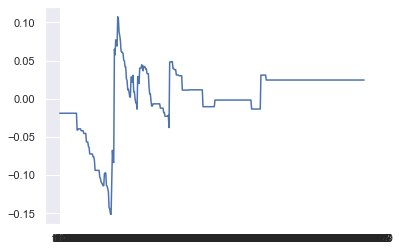

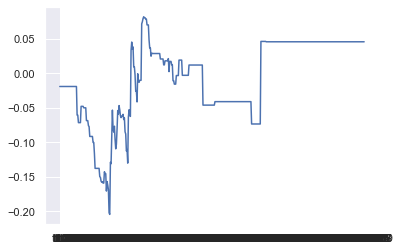

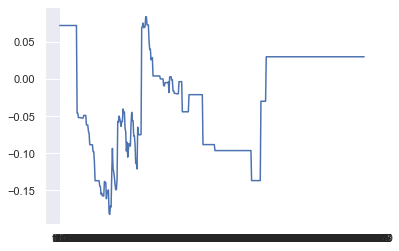

In [185]:
#No considerations of the volumes
from scipy.stats import pearsonr, linregress
predicted = pd.read_csv("./AgentModel_OUTPUT/record_region_ratiowXVolumes.csv", index_col=0)
observed_mpi1 = grp_mean["MPI 1"]
observed_mpi3 = grp_mean["MPI 3"]
observed_mpi6 = grp_mean["MPI 6"]
lst_table = [observed_mpi1, observed_mpi3, observed_mpi6]
df = pd.DataFrame(index=["obs_MPI1","obs_MPI3", "obs_MPI6"], columns=predicted.columns)

# for idx, obs_result in enumerate(lst_table):
#     for steps in predicted.columns:
#         df.loc[df.index[idx],steps] = pearsonr(predicted[steps],obs_result)[0]

#     plt.plot(df.iloc[idx,:])
#     plt.show()

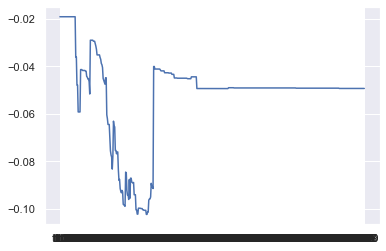

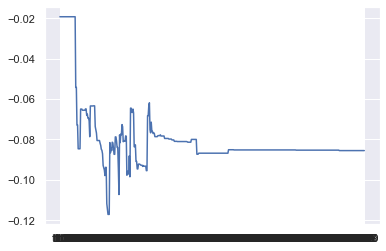

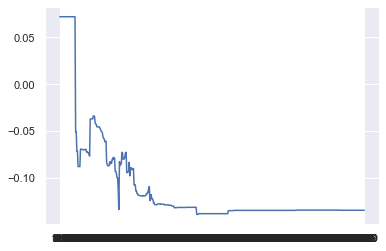

In [193]:
# With volumes?
from scipy.stats import pearsonr, linregress
predicted = pd.read_csv("./AgentModel_OUTPUT/record_region_ratio.csv", index_col=0)
observed_mpi1 = grp_mean["MPI 1"]
observed_mpi3 = grp_mean["MPI 3"]
observed_mpi6 = grp_mean["MPI 6"]
lst_table = [observed_mpi1, observed_mpi3, observed_mpi6]
df = pd.DataFrame(index=["obs_MPI1","obs_MPI3", "obs_MPI6"], columns=predicted.columns)

for idx, obs_result in enumerate(lst_table):
    for steps in predicted.columns:
        df.loc[df.index[idx],steps] = pearsonr(predicted[steps],obs_result)[0]

    plt.plot(df.iloc[idx,:])
    plt.show()

In [ ]:
### RUN 
for inf in np.linspace(start=0.001, stop=0.25, num=10):
    print("Inf is", inf)
    parameters = {
        'population_syn': 5,
        'infection_chance': inf,
        'recovery_chance': 0,
        'degradation_rate':0.001,
        'refolding': 0.5,
        'seed': 15, #iCPu
        'volume_table': volumes,
        'energy_table': syn_endo,
        "steps":600
    }
    graph = nx.DiGraph(W)
    model = SynModel(parameters)
    results = model.run()
    
    results["variables"]["SynModel"].to_csv("Share_per_region_{}.csv".format(inf))
    fig, ax = plt.subplots()
    syn_stackplot(results.variables.SynModel, ax)
    plt.show()
####NEXT ==> Endogenous production ==> Binning to check
#        ==> Degradation based on GBA + reduced within time for the infected ?
#        ==> transmission proba depending on number of molecules
#        ==> System

In [ ]:
### RUN 
for inf in np.linspace(start=0.001, stop=0.25, num=10):
    print("Infection chance", inf)
    parameters = {
        'population_syn': 5,
        'infection_chance': inf,
        'recovery_chance': 0,
        'degradation_rate':0,
        'refolding': 0.5,
        'seed': 15, #iCPu
        'volume_table': volumes,
        'energy_table': syn_endo,
        "steps":600
    }
    graph = nx.DiGraph(W)
    model = SynModel(parameters)
    results = model.run()
    
    results["variables"]["SynModel"].to_csv("Null_deg_Share_per_region_{}.csv".format(inf))
    fig, ax = plt.subplots()
    syn_stackplot(results.variables.SynModel, ax)
    plt.show()
####NEXT ==> Endogenous production ==> Binning to check
#        ==> Degradation based on GBA + reduced within time for the infected ?
#        ==> transmission proba depending on number of molecules
#        ==> System

In [ ]:
### RUN 
for inf in np.linspace(start=0.25, stop=0.50, num=10):
    print("Infection chance", inf)
    parameters = {
        'population_syn': 5,
        'infection_chance': inf,
        'recovery_chance': 0,
        'degradation_rate':0.001,
        'refolding': 0.5,
        'seed': 15, #iCPu
        'volume_table': volumes, 
        'energy_table': syn_endo,
        "steps":600
    }
    graph = nx.DiGraph(W)
    model = SynModel(parameters)
    results = model.run()
    
    results["variables"]["SynModel"].to_csv("Share_per_region_{}.csv".format(inf))
    fig, ax = plt.subplots()
    syn_stackplot(results.variables.SynModel, ax)
    plt.show()
####NEXT ==> Endogenous production ==> Binning to check
#        ==> Degradation based on GBA + reduced within time for the infected ?
#        ==> transmission proba depending on number of molecules
#        ==> System

In [ ]:
### RUN 
for inf in np.linspace(start=0.25, stop=0.50, num=10):
    print("Infection chance", inf)    
    parameters = {
        'population_syn': 5,
        'infection_chance': inf,
        'recovery_chance': 0,
        'degradation_rate':0,
        'refolding': 0.5,
        'seed': 15, #iCPu
        'volume_table': volumes,
        'energy_table': syn_endo,
        "steps":600
    }
    graph = nx.DiGraph(W)
    model = SynModel(parameters)
    results = model.run()
    
    results["variables"]["SynModel"].to_csv("Null_deg_Share_per_region_{}.csv".format(inf))
    fig, ax = plt.subplots()
    syn_stackplot(results.variables.SynModel, ax)
    plt.show()
####NEXT ==> Endogenous production ==> Binning to check
#        ==> Degradation based on GBA + reduced within time for the infected ?
#        ==> transmission proba depending on number of molecules
#        ==> System

In [114]:
results["variables"]["SynModel"]

S         I         R
t                               
0   0.995098  0.004902  0.000000
1   0.995098  0.004902  0.000000
2   0.995098  0.004902  0.000000
3   0.995098  0.004902  0.000000
4   0.995098  0.004902  0.000000
5   0.990196  0.004902  0.004902
6   0.990196  0.004902  0.004902
7   0.990196  0.004902  0.004902
8   0.990196  0.004902  0.004902
9   0.990196  0.004902  0.004902
10  0.990196  0.004902  0.004902

In [16]:
results["variables"]["SynModel"].to_csv("Share_per_region.csv")

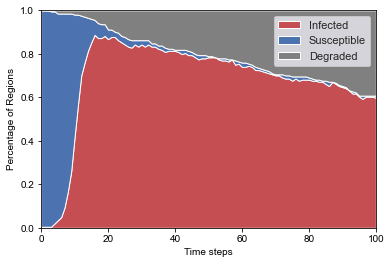

In [29]:
def syn_stackplot(data, ax):
    """ Stackplot of region's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['I', 'S', 'R']]

    sns.set()
    ax.stackplot(x, y, labels=['Infected', 'Susceptible', 'Degraded'],
                 colors = ['r', 'b', 'grey'])

    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of Regions")

fig, ax = plt.subplots()
syn_stackplot(results.variables.SynModel, ax)

In [34]:
import tqdm as tqdm
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("a-syn spread")
    ax2.set_title(f"Share infected: {m.I}")

    # Plot stackplot on first axis
    syn_stackplot(m.output.variables.SynModel, ax1)

    # Plot network on second axis
    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.condition]
    nx.draw_circular(graph, node_color=colors,
                     node_size=50, ax=ax2)

fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure
animation = ap.animate(SynModel(parameters), fig, axs, animation_plot)

Idx: 21 Values if AgentNode (iCPu) Agent number a_syn (Obj 139)
Idx: 22 Values if AgentNode (iCPu) Agent number a_syn (Obj 140)
Idx: 23 Values if AgentNode (iCPu) Agent number a_syn (Obj 141)
Idx: 24 Values if AgentNode (iCPu) Agent number a_syn (Obj 142)
Idx: 25 Values if AgentNode (iCPu) Agent number a_syn (Obj 143)
random selected agent of the CPu is a_syn (Obj 141)
The infected seed has a condition value equal to: 1


In [35]:
IPython.display.HTML(animation.to_jshtml())

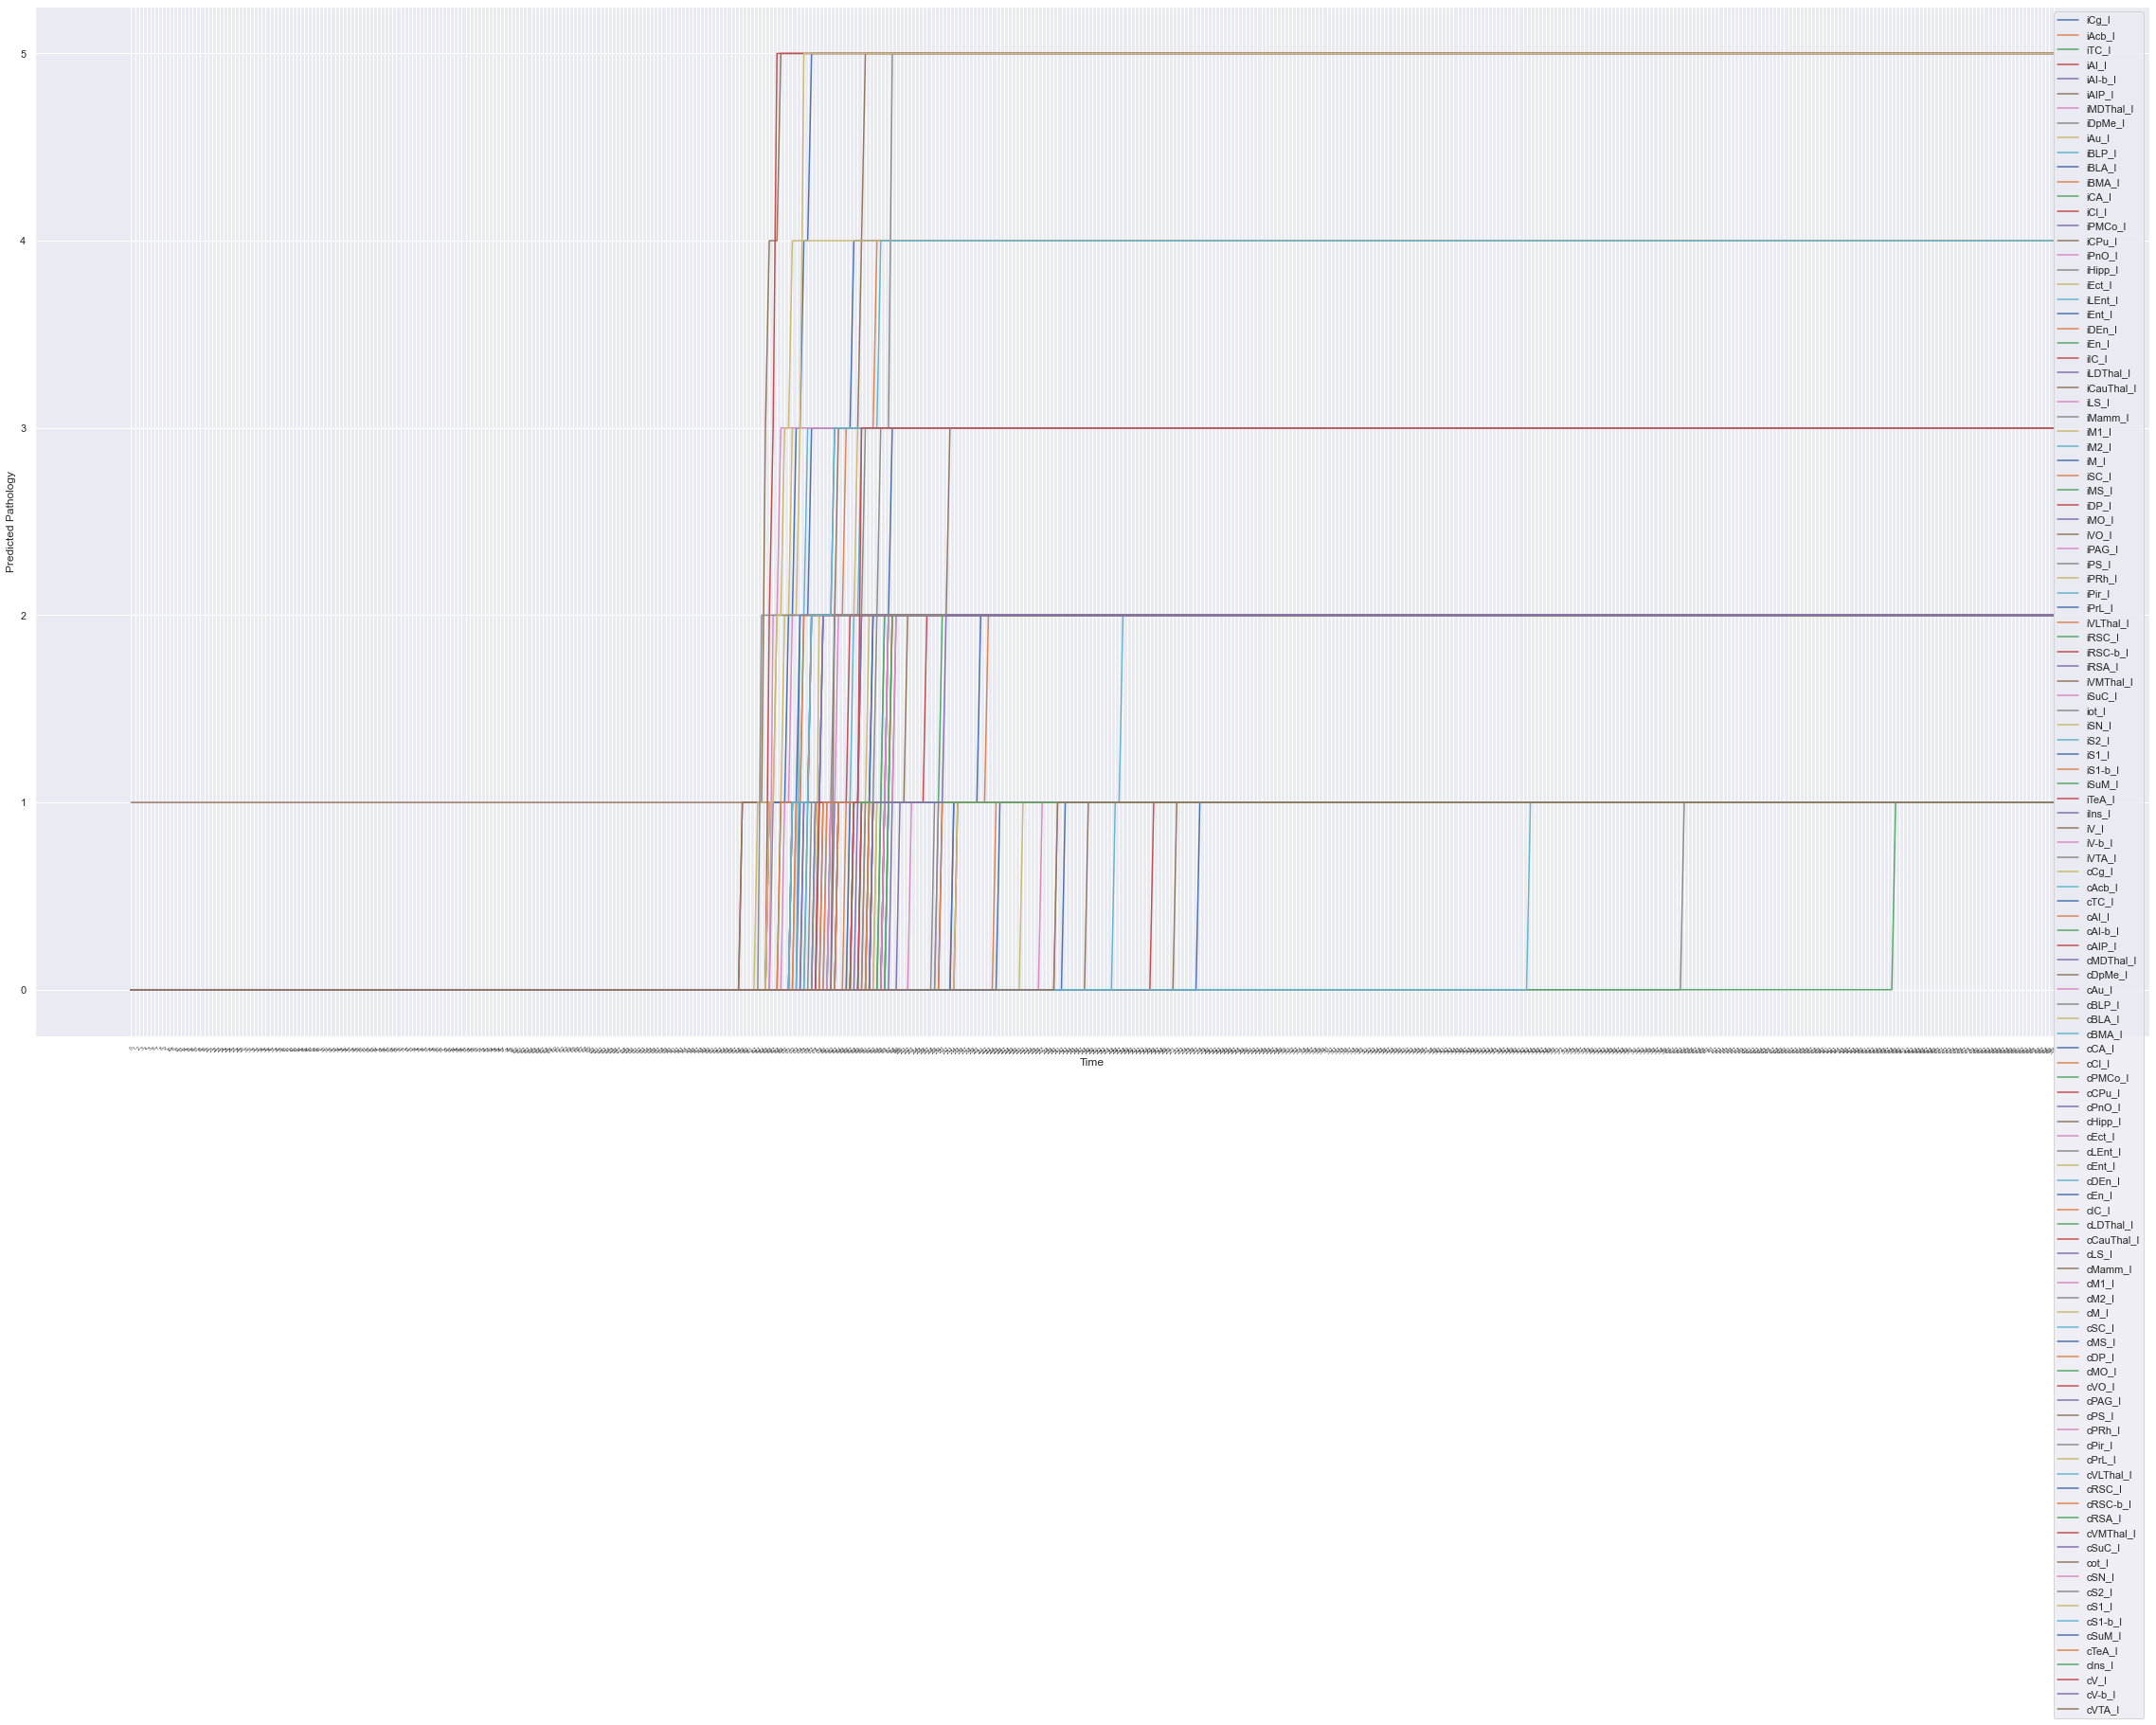

In [170]:
table=pd.read_csv("region_record_I.csv", index_col=0)
table = table.transpose()
import seaborn as sns

from matplotlib.legend_handler import HandlerLine2D
from matplotlib import cm


fig = plt.figure(figsize=(40,20))
result = plt.plot(table)

locs, labels=plt.xticks()
plt.xticks(locs,[i for i in table.index], fontsize=5, rotation=45)

plt.xlabel("Time")
plt.ylabel("Predicted Pathology")
labels = [i for i in table.columns]
plt.legend(labels)

plt.show()